# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:#222021;font-size:130%;text-align:center;border-radius:10px 10px;margin-bottom:20px;">**Customer Churn Prediction**</p>

<p align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1358/0*dzmm3qresODlScte" alt="Customer Churn" width="600">
  <br>
  Source : Medium.com
</p>

# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:#222021;font-size:130%;text-align:center;border-radius:10px 10px;margin-bottom:20px;">**1. Introduction**</p>

**Author : Salsa Sabitha Hurriyah**
  
**Objective :**  
Classification Model for Bank Costumer Churn Prediction.   
  
**Data Source :**  
Kaggle : https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction

**Data Overview :**  
This dataset contains information on bank customers who either left the bank or continue to be a customer.

# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:#222021;font-size:130%;text-align:center;border-radius:10px 10px;margin-bottom:10px;">**2. Import Libraries**</p>

In [4]:
# For Data Manipulation
import pandas as pd
import numpy as np
from scipy.stats import skew, pearsonr, kendalltau, spearmanr, uniform, randint

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Model
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

# For Feature Engineering
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from scipy.stats import kendalltau, spearmanr
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# For Model Evaluation
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

# For model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# For Saving Model
import pickle
import joblib

# For Deactivate Warning
import warnings
warnings.filterwarnings('ignore')

# Display all columns
pd.options.display.max_columns = 200

# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:#222021;font-size:130%;text-align:center;border-radius:10px 10px;margin-bottom:10px;">**3. Data Loading**</p>

In [5]:
# Read csv into data frame
dataset = pd.read_csv('Churn_Modelling.csv')

In [6]:
# Create a new variable to store a copy of the frame data
df = dataset.copy()

In [7]:
# Check data shape
df.shape

(10002, 14)

In [8]:
# Show 5 head data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


**Explanation :**  


# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:#222021;font-size:130%;text-align:center;border-radius:10px 10px;margin-bottom:10px;">**4. Exploratory Data Analysis (EDA)**</p>

In [9]:
# Summary data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


**Explanation :**  

- The dataset consists of 10,002 rows and 14 columns.  
- The data type consists of 5 float columns, 6 integer columns, and 3 object columns.  
- It can be seen that there are also missing values in the Geography, Age, HasCrCard, and IsActiveMember columns.

In [10]:
# Check missing value
df.isna().sum().sort_values(ascending=False)

Geography          1
Age                1
HasCrCard          1
IsActiveMember     1
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Gender             0
Tenure             0
Balance            0
NumOfProducts      0
EstimatedSalary    0
Exited             0
dtype: int64

**Explanation :**  

There is 1 missing value in each of the Geography, Age, HasCrCard, and IsActiveMember columns.

In [11]:
# Check duplicate data
df.duplicated().sum()

2

**Explanation :**  

There are 2 duplicate data.

In [12]:
# Cardinality Check for Categorical Columns

# set colwidth hidher
pd.set_option('display.max.colwidth', None)

# Get only Categorical columns, except 'Surname'
cat_cols = df.select_dtypes(include='object').columns.drop(['Surname'])

# Create a looping for unique values details
listItem = []
for col in cat_cols :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

# Show the dataframe
pd.DataFrame(columns=['Column Name', 'Number of Unique Values', 'Unique Values'], data=listItem)

,Column Name,Number of Unique Values,Unique Values
0,Geography,3,"[France, Spain, nan, Germany]"
1,Gender,2,"[Female, Male]"


**Explanation :**  

- Geography column has 3 unique values of France, Spain, and Germany.
- Gender column has 2 unique values of Female and Male.

In [13]:
# Cardinality Check for Numerical Columns

# set colwidth hidher
pd.set_option('display.max.colwidth', None)

# Get only numeric columns, except 'RowNumber' and 'CustomerId'
num_cols = df.select_dtypes(include='number').columns.drop(['RowNumber', 'CustomerId'])

# Create a looping for unique values details
listItem = []
for col in num_cols :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

# Show the dataframe
pd.DataFrame(columns=['Column Name', 'Number of Unique Values', 'Unique Values'], data=listItem)

,Column Name,Number of Unique Values,Unique Values
0,CreditScore,460,"[619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476, 549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756, 571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472, 465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601, 656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675, 738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506, 493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814, 710, 413, 623, 670, 622, 785, 605, 479, 685, ...]"
1,Age,73,"[42.0, 41.0, 39.0, 43.0, 44.0, 50.0, 29.0, nan, 31.0, 24.0, 34.0, 25.0, 35.0, 45.0, 58.0, 45.25, 32.34, 38.0, 46.0, 36.44, 36.0, 33.0, 40.0, 51.0, 61.0, 49.0, 32.0, 27.0, 37.0, 19.0, 66.0, 56.0, 26.0, 21.0, 55.0, 75.0, 22.0, 30.0, 28.0, 65.0, 48.0, 52.0, 57.0, 73.0, 47.0, 54.0, 72.0, 20.0, 67.0, 79.0, 62.0, 53.0, 80.0, 59.0, 68.0, 23.0, 60.0, 70.0, 63.0, 64.0, 18.0, 82.0, 69.0, 74.0, 71.0, 76.0, 77.0, 88.0, 85.0, 84.0, 78.0, 81.0, 92.0, 83.0]"
2,Tenure,11,"[2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]"
3,Balance,6382,"[0.0, 83807.86, 159660.8, 125510.82, 113755.78, 115046.74, 142051.07, 134603.88, 102016.72, 143129.41, 132602.88, 136815.64, 141349.43, 59697.17, 85311.7, 110112.54, 134264.04, 145260.23, 76548.6, 70349.48, 122522.32, 117419.35, 131394.56, 155931.11, 109421.13, 112045.67, 137843.8, 103391.38, 103769.22, 116363.37, 146050.97, 125561.97, 98495.72, 125211.92, 127864.4, 75888.2, 40685.92, 136857.0, 152328.88, 56084.69, 78707.16, 109166.37, 169831.46, 101633.04, 123180.01, 150725.53, 98373.26, 133745.44, 163607.18, 157780.84, 178718.19, 77253.22, 122189.66, 96645.54, 90307.62, 121681.82, 81623.67, 118626.55, 176273.95, 102827.44, 97086.4, 82674.15, 107073.27, 88938.62, 99806.85, 150092.8, 92833.89, 90536.81, 108055.1, 100238.35, 106190.55, 154475.54, 132351.29, 167864.4, 107818.63, 185173.81, 129433.34, 120193.42, 126384.42, 152603.45, 148507.24, 101827.07, 130862.43, 122570.87, 124828.46, 144895.05, 63663.93, 133463.1, 213146.2, 129490.36, 137452.09, 125851.93, 40915.55, 113157.22, 138296.94, 106967.18, 120681.63, 127609.59, 97259.25, 123246.7, ...]"
4,NumOfProducts,4,"[1, 3, 2, 4]"
5,HasCrCard,2,"[1.0, 0.0, nan]"
6,IsActiveMember,2,"[1.0, 0.0, nan]"
7,EstimatedSalary,9999,"[101348.88, 112542.58, 113931.57, 93826.63, 79084.1, 149756.71, 10062.8, 119346.88, 74940.5, 71725.73, 80181.12, 76390.01, 26260.98, 190857.79, 65951.65, 64327.26, 5097.67, 14406.41, 158684.81, 54724.03, 170886.17, 138555.46, 118913.53, 8487.75, 187616.16, 124508.29, 170041.95, 38433.35, 100187.43, 53483.21, 140469.38, 156731.91, 81898.81, 34410.55, 142033.07, 27822.99, 114066.77, 98453.45, 40812.9, 178074.04, 70154.22, 181297.65, 94153.83, 194365.76, 158338.39, 126517.46, 119708.21, 117622.8, 90878.13, 194099.12, 198059.16, 86424.57, 116978.19, 164040.94, 40014.76, 113410.49, 87107.57, 45613.75, 1643.11, 46775.28, 84509.57, 126494.82, 178798.13, 99398.36, 92840.67, 27758.36, 110431.51, 196673.28, 113656.85, 18203.0, 28373.86, 33953.87, 44203.55, 58426.81, 145562.4, 22388.0, 139161.64, 148210.64, 194239.63, 98301.61, 171413.66, 136458.19, 26019.59, 159235.29, 1907.66, 114675.75, 128643.35, 151869.35, 93251.42, 156791.36, 174205.22, 147132.46, 109614.57, 172290.61, 85982.47, 121277.78, 64595.25, 197276.13, 99645.04, 6534.18, ...]"
8,Exited,2,"[1, 0]"


**Explanation :**  

- There are 9 numeric columns (excluding RowNumber and CustomerId).
- CreditScore: There are 460 unique values. This dataset includes customers with various levels of creditworthiness.
- Age: There are 73 unique values, with ages ranging from teenage to elderly. 
- Tenure: There are 11 unique values. These range from 0 to 10, indicating new customers to old customers.
- Balance: There are 6382 unique values with a huge variation in balance, indicating that the dataset includes customers from various economic backgrounds.
- NumOfProducts: There are 4 products offered by the bank.
- EstimatedSalary: Has 9999 unique values.
- HasCrCard, IsActiveMember, Exited: Binary variables with 2 unique values (1, 0).

## **4.1 Distribution of Each Numeric Column**

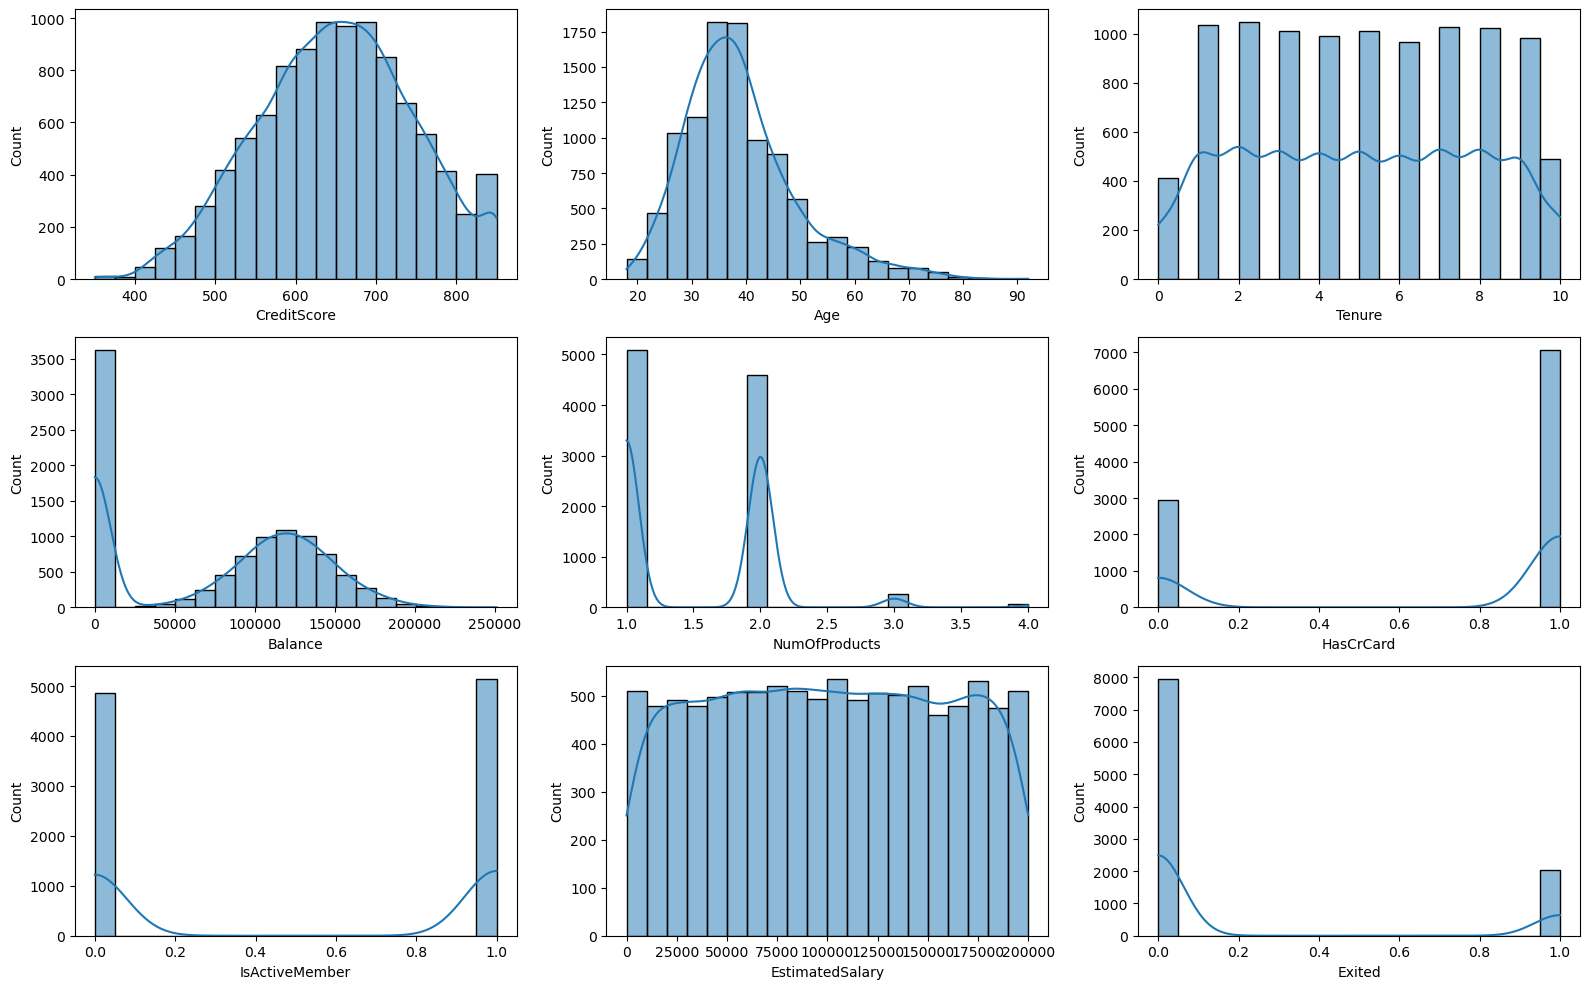

In [14]:
# Set figure size
plt.figure(figsize=(16, 10))

# Looping to display the plot for each column
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df, x=col, bins=20, kde=True)
    plt.xlabel(col)
plt.tight_layout()
plt.show()

**Explanation :**  

- **CreditScore:** The credit score distribution shows a near-normal shape but is slightly skewed to the left. This indicates that most customers have good credit scores with some customers having low scores.
- **Age:** The age distribution is skewed to the right, which indicates that most customers are in the young and middle age groups with fewer customers in the older age groups.
- **Tenure:** The distribution of years shows a fairly even distribution across the values with a slight dip at the maximum value of 10 years. This could indicate that customers tend to stay for a similar length of time at the bank.
- **Balance:** Many customers have significant zero balances, and the rest show a bimodal distribution. This could indicate two different groups of customers, those who do not actively use their bank balance and those who have a fairly varied amount of balance.
- **NumOfProducts:** The majority of customers use 1 or 2 products with very few using 3 or 4 products. This suggests that most customers are not very diversified in their product usage.
- **HasCrCard:** More customers have a credit card than not. This could indicate a good breakthrough of the bank's credit card products.
- **IsActiveMember:** The distribution of active and inactive customers is almost similar, indicating a balanced spread between engaged and less engaged customers.
- **Estimated Salary:** Estimated salary shows a very wide uniform distribution, which shows no particular patterns or clear trends.
- **Exited:** Far more customers did not quit (Exited = 0) than quit (Exited = 1), but the number of quitters is not negligible and requires further analysis.

## **4.2 Distribution of Customer Churn**

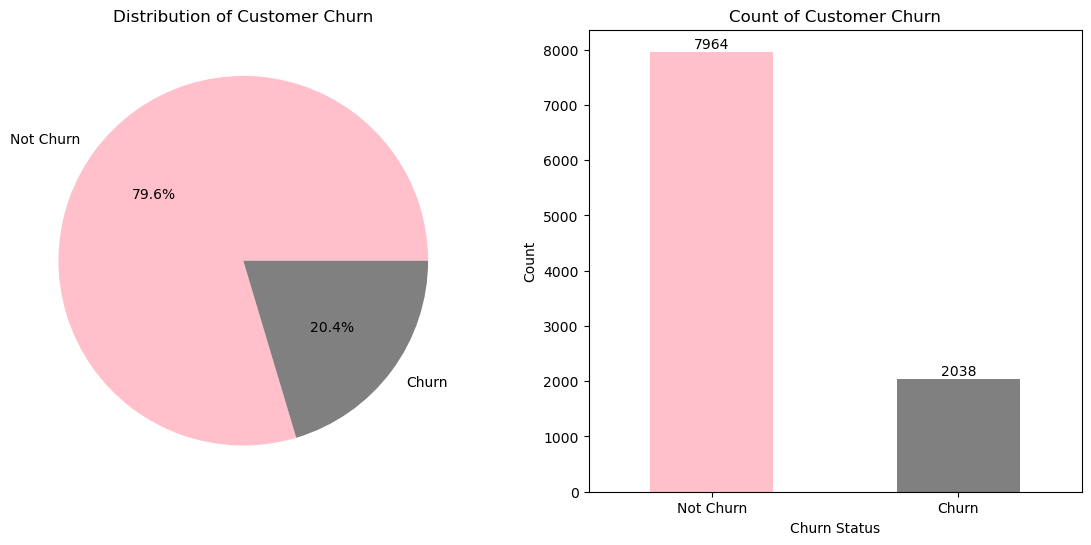

In [15]:
# Counts the number of unique values in the 'Exited' column
value_counts = df['Exited'].value_counts()

# Create subplots for pie charts and bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting pie chart
colors_pie = ['pink', 'grey']
ax1.pie(value_counts, labels=['Not Churn', 'Churn'], autopct='%1.1f%%', colors=colors_pie)
ax1.set_title('Distribution of Customer Churn', fontsize=12)

# Plotting bar chart
colors_bar = ['pink', 'grey']
value_counts.index = ['Not Churn', 'Churn']
value_counts.plot(kind='bar', ax=ax2, color=colors_bar)
ax2.set_title('Count of Customer Churn', fontsize=12)
ax2.set_xlabel('Churn Status', fontsize=10)
ax2.set_ylabel('Count', fontsize=10)
ax2.tick_params(axis='x', rotation=0)

# Annotate each bar with its count value
for i, v in enumerate(value_counts):
    ax2.text(i, v + 10, str(v), ha='center', va='bottom')

plt.show()

**Explanation :**  


## **4.3 Customer Churn by Age**

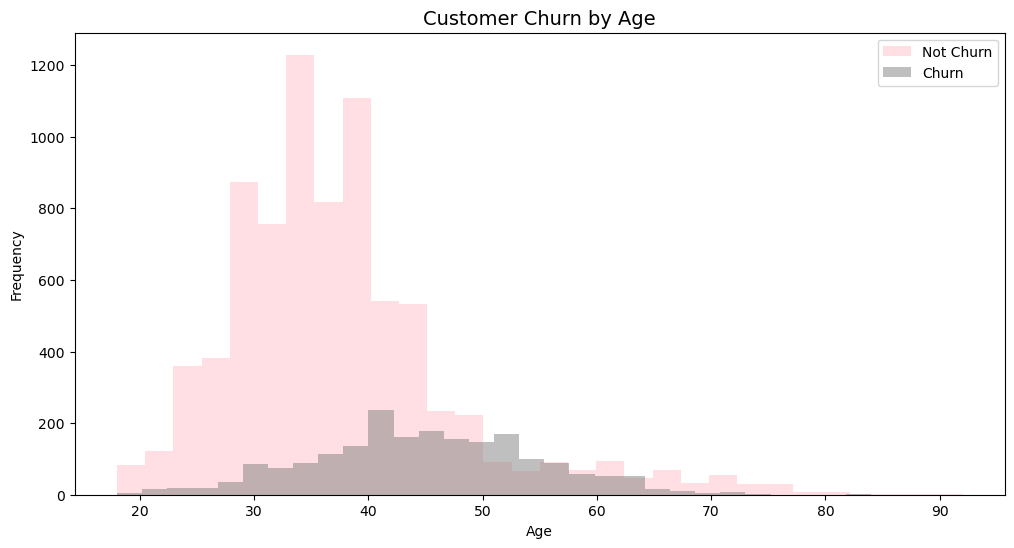

In [16]:
# Create two subsets of data based on churn
churn_customers = df[df['Exited'] == 1]
not_churn_customers = df[df['Exited'] == 0]

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Added a histogram for non-churn customers
plt.hist(not_churn_customers['Age'], bins=30, alpha=0.5, label='Not Churn', color='pink')

# Added a histogram for churn customers
plt.hist(churn_customers['Age'], bins=30, alpha=0.5, label='Churn', color='grey')

# Add title and label
plt.title('Customer Churn by Age', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Display the plot
plt.show()


**Explanation :**  


## **4.4 Customer Churn by Gender**

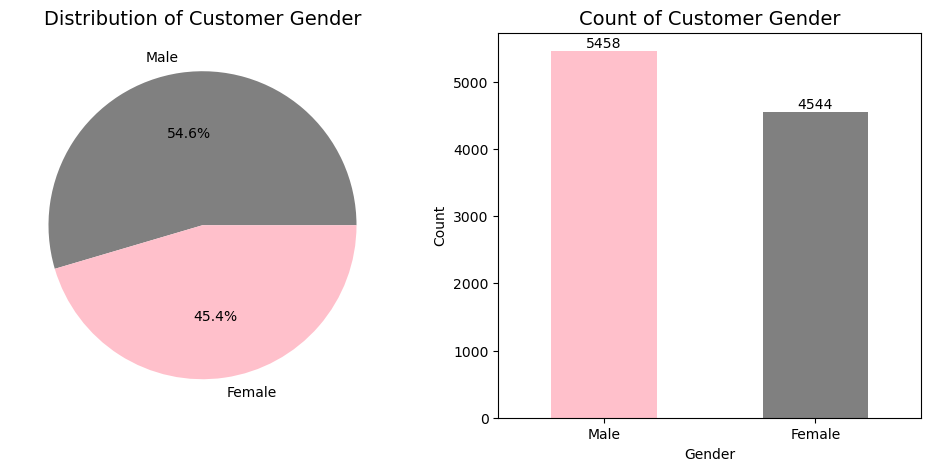

In [17]:
# Counts the number of unique values in the 'Exited' column
value_counts = df['Gender'].value_counts()

# Create subplots for pie charts and bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plotting pie chart
colors_pie = ['grey', 'pink']
ax1.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=colors_pie)
ax1.set_title('Distribution of Customer Gender', fontsize=14)

# Plotting bar chart
colors_bar = ['pink', 'grey']
value_counts.plot(kind='bar', ax=ax2, color=colors_bar)
ax2.set_title('Count of Customer Gender', fontsize=14)
ax2.set_xlabel('Gender', fontsize=10)
ax2.set_ylabel('Count', fontsize=10)
ax2.tick_params(axis='x', rotation=0)

# Annotate each bar with its count value
for i, v in enumerate(value_counts):
    ax2.text(i, v + 10, str(v), ha='center', va='bottom')

plt.show()

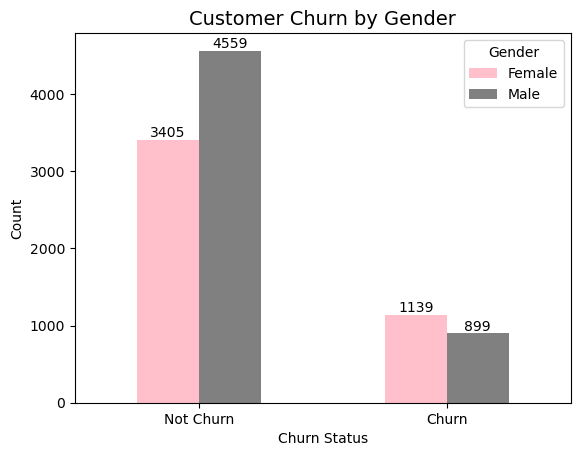

In [18]:
# Grouping the DataFrame by 'Exited' and 'Gender' columns and counting the occurrences
group = df.groupby(['Exited', 'Gender']).size().unstack()

# Creating a bar chart using the DataFrame 'group', specifying colors for each bar
bar_char = group.plot(kind='bar', color=['pink', 'grey'])

# Adding labels to each bar in the bar chart
for container in bar_char.containers:
    bar_char.bar_label(container)

# Setting the x-axis labels to 'Not Churn' and 'Churn' with no rotation
bar_char.set_xticklabels(['Not Churn', 'Churn'], rotation=0)

# Setting the label for the x-axis and y-axis
bar_char.set_xlabel('Churn Status', fontsize=10)
bar_char.set_ylabel('Count', fontsize=10)

# Setting the title of the plot
bar_char.set_title('Customer Churn by Gender', fontsize=14)

# Displaying the plot
plt.show()

In [19]:
genders = ['Male', 'Female']

for gender in genders:
    # Use the .loc[] method to retrieve customer churn data for the current gender
    churn_customers = df.loc[(df['Gender'] == gender) & (df['Exited'] == 1)]
    
    # Calculates the number of customers who churn for the current gender
    total_churn_customers = len(churn_customers)
    print(f"Total {gender} customers who churned:", total_churn_customers)
    
    # Use the .loc[] method to retrieve customer data for the current gender
    total_customers = df.loc[df['Gender'] == gender]
    
    # Calculates the total number of customers for the current gender
    total_gender_customers = len(total_customers)
    print(f"Total {gender} customers:", total_gender_customers)
    
    # Calculates the percentage of churned customers out of total customers for the current gender
    percentage_churn_customers = (total_churn_customers / total_gender_customers) * 100
    print(f"Percentage of {gender} customers who churned:", percentage_churn_customers, "%")
    print()

Total Male customers who churned: 899
Total Male customers: 5458
Percentage of Male customers who churned: 16.471234884573104 %

Total Female customers who churned: 1139
Total Female customers: 4544
Percentage of Female customers who churned: 25.066021126760564 %



**Explanation :**  


## **4.5 Customer Churn by Geography**

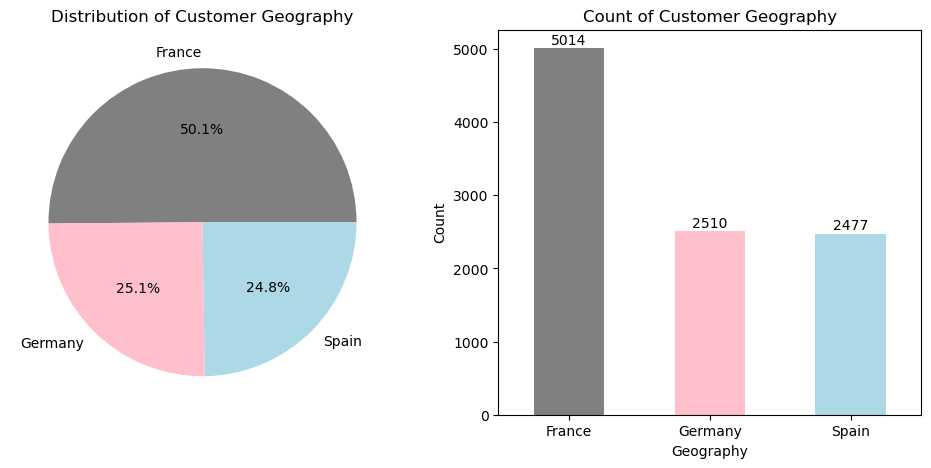

In [20]:
# Counts the number of unique values in the 'Exited' column
value_counts = df['Geography'].value_counts()

# Create subplots for pie charts and bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
colors = ['grey', 'pink', 'lightblue']

# Plotting pie chart
ax1.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=colors)
ax1.set_title('Distribution of Customer Geography', fontsize=12)

# Plotting bar chart
value_counts.plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('Count of Customer Geography', fontsize=12)
ax2.set_xlabel('Geography', fontsize=10)
ax2.set_ylabel('Count', fontsize=10)
ax2.tick_params(axis='x', rotation=0)

# Annotate each bar with its count value
for i, v in enumerate(value_counts):
    ax2.text(i, v + 10, str(v), ha='center', va='bottom')

plt.show()

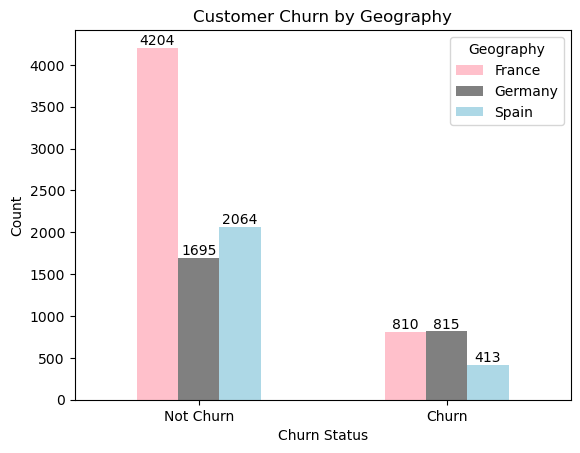

In [21]:
# Grouping the DataFrame by 'Exited' and 'Geography' columns and counting the occurrences
group = df.groupby(['Exited', 'Geography']).size().unstack()

# Creating a bar chart using the DataFrame 'group', specifying colors for each bar
bar_char = group.plot(kind='bar', color=['pink', 'grey', 'lightblue'])

# Adding labels to each bar in the bar chart
for container in bar_char.containers:
    bar_char.bar_label(container)

# Setting the x-axis labels to 'Not Churn' and 'Churn' with no rotation
bar_char.set_xticklabels(['Not Churn', 'Churn'], rotation=0)

# Setting the label for the x-axis and y-axis
bar_char.set_xlabel('Churn Status', fontsize=10)
bar_char.set_ylabel('Count', fontsize=10)

# Setting the title of the plot
bar_char.set_title('Customer Churn by Geography', fontsize=12)

# Displaying the plot
plt.show()

In [22]:
geographies = ['France', 'Germany', 'Spain']

for geography in geographies:
    # Use the .loc[] method to retrieve customer churn data for the current geography
    churn_customers = df.loc[(df['Exited'] == 1) & (df['Geography'] == geography)]
    
    # Calculates the number of customers who churn for the current geography
    total_churn_customers = len(churn_customers)
    print(f"Total customers who churned in {geography}:", total_churn_customers)
    
    # Use the .loc[] method to retrieve customer data for the current geography
    total_customers = df.loc[df['Geography'] == geography]
    
    # Calculates the total number of customers for the current geography
    total_customers_count = len(total_customers)
    print(f"Total customers in {geography}:", total_customers_count)
    
    # Calculates the percentage of churned customers out of total customers for the current geography
    if total_customers_count > 0:
        percentage_churn_customers = (total_churn_customers / total_customers_count) * 100
    else:
        percentage_churn_customers = 0
    
    print(f"Percentage of customers who churned in {geography}:", percentage_churn_customers, "%")
    print()


Total customers who churned in France: 810
Total customers in France: 5014
Percentage of customers who churned in France: 16.15476665337056 %

Total customers who churned in Germany: 815
Total customers in Germany: 2510
Percentage of customers who churned in Germany: 32.47011952191235 %

Total customers who churned in Spain: 413
Total customers in Spain: 2477
Percentage of customers who churned in Spain: 16.673395236172787 %



**Explanation :**  


## **4.6 Customer Churn by Tenure**

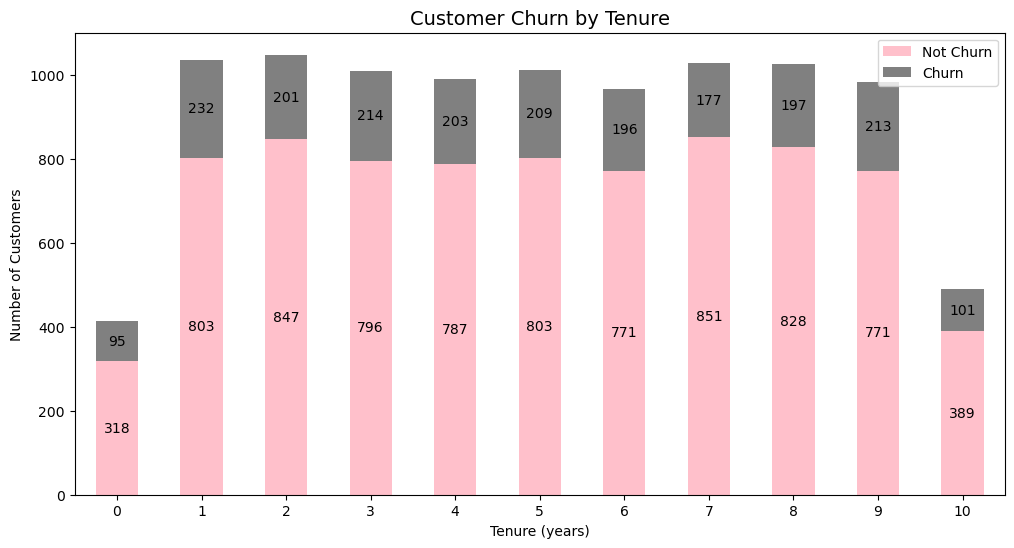

In [23]:
# Calculate the number of churners and non-churners for each tenure
churn_by_tenure = df.groupby(['Tenure', 'Exited']).size().unstack()

# Create a bar plot
ax = churn_by_tenure.plot(kind='bar', stacked=True, color=['pink', 'grey'], figsize=(12, 6))

# Add title and label
plt.title('Customer Churn by Tenure', fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Tenure (years)')
plt.ylabel('Number of Customers')
plt.legend(['Not Churn', 'Churn'])

# Adds a number above each bar
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Display the plot
plt.show()

## **4.7 Customer Churn by Number of Product**

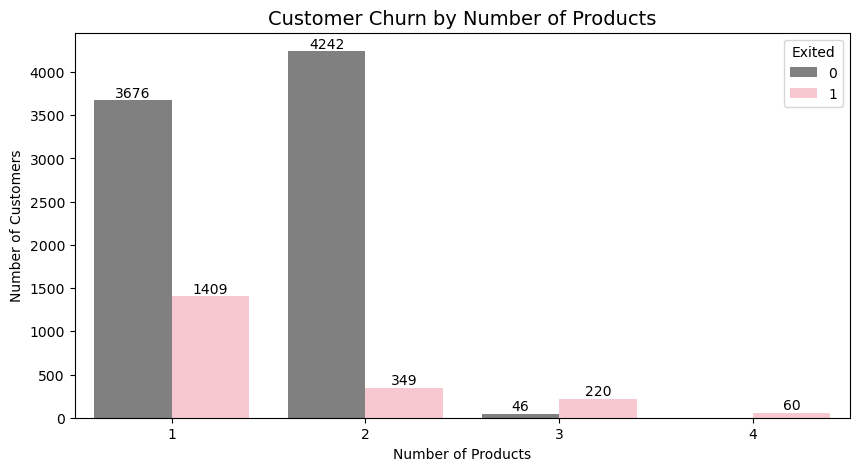

In [24]:
# Set the size of the figure
plt.figure(figsize=(10, 5))

# Create a count plot
ax = sns.countplot(data=df, x='NumOfProducts', hue='Exited', palette=['grey', 'pink'])

# Add title and label
plt.title('Customer Churn by Number of Products', fontsize=14)
plt.xlabel('Number of Products', fontsize=10)
plt.ylabel('Number of Customers', fontsize=10)

# Adds a number above each bar
for container in ax.containers:
    ax.bar_label(container)

# Display the plot
plt.show()


In [25]:
products = [1, 2, 3, 4]

for product in products:
    # Filter customers based on NumOfProducts
    churn_customers = df.loc[(df['Exited'] == 1) & (df['NumOfProducts'] == product)]
    total_churn_customers = len(churn_customers)
    print(f"Total customers who churned with {product} products:", total_churn_customers)
    
    # Total customers with the current NumOfProducts
    total_customers = df.loc[df['NumOfProducts'] == product]
    total_customers_count = len(total_customers)
    print(f"Total customers with {product} products:", total_customers_count)
    
    # Calculate percentage of churned customers
    if total_customers_count > 0:
        percentage_churn_customers = (total_churn_customers / total_customers_count) * 100
    else:
        percentage_churn_customers = 0
    
    print(f"Percentagge of customers who churned with {product} products:", percentage_churn_customers, "%")
    print()


Total customers who churned with 1 products: 1409
Total customers with 1 products: 5085
Percentagge of customers who churned with 1 products: 27.708947885939033 %

Total customers who churned with 2 products: 349
Total customers with 2 products: 4591
Percentagge of customers who churned with 2 products: 7.601829666739272 %

Total customers who churned with 3 products: 220
Total customers with 3 products: 266
Percentagge of customers who churned with 3 products: 82.70676691729322 %

Total customers who churned with 4 products: 60
Total customers with 4 products: 60
Percentagge of customers who churned with 4 products: 100.0 %



**Explanation :**  


## **4.8 Customer Churn by Has Credit Card or Not**

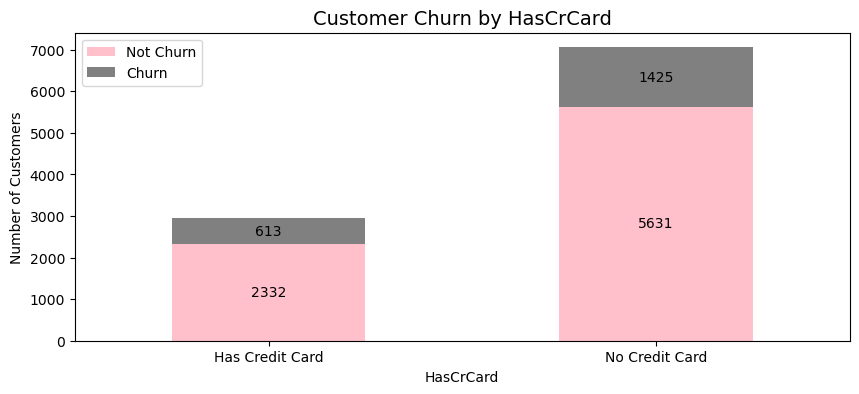

In [26]:
# Calculate the number of churners and non-churners for each HasCrCard
churn_by_HasCrCard = df.groupby(['HasCrCard', 'Exited']).size().unstack()

# Create a bar plot
ax = churn_by_HasCrCard.plot(kind='bar', stacked=True, color=['pink', 'grey'], figsize=(10, 4))

# Add title and label
plt.title('Customer Churn by HasCrCard', fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('HasCrCard', fontsize=10)
plt.ylabel('Number of Customers', fontsize=10)
plt.legend(['Not Churn', 'Churn'])

# Set custom x-axis labels
ax.set_xticklabels(['Has Credit Card', 'No Credit Card'])

# Adds a number above each bar
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Display the plot
plt.show()

In [27]:
# List of values for HasCrCard
has_credit_card_values = [0, 1]

for has_credit_card in has_credit_card_values:
    # Convert the value 0 to "No Credit Card" and the value 1 to "Has Credit Card"
    has_credit_card_label = "No Credit Card" if has_credit_card == 0 else "Has Credit Card"

    # Filter customers based on HasCrCard value
    churn_customers = df.loc[(df['Exited'] == 1) & (df['HasCrCard'] == has_credit_card)]
    total_churn_customers = len(churn_customers)
    print(f"Total customers who churned with {has_credit_card_label}:", total_churn_customers)
    
    # Total customers with the current HasCrCard value
    total_customers = df.loc[df['HasCrCard'] == has_credit_card]
    total_customers_count = len(total_customers)
    print(f"Total customers with {has_credit_card_label}:", total_customers_count)
    
    # Calculate percentage of churned customers
    if total_customers_count > 0:
        percentage_churn_customers = (total_churn_customers / total_customers_count) * 100
    else:
        percentage_churn_customers = 0
    
    print(f"Percentage of customers who churned with {has_credit_card_label}:", percentage_churn_customers, "%")
    print()


Total customers who churned with No Credit Card: 613
Total customers with No Credit Card: 2945
Percentage of customers who churned with No Credit Card: 20.814940577249573 %

Total customers who churned with Has Credit Card: 1425
Total customers with Has Credit Card: 7056
Percentage of customers who churned with Has Credit Card: 20.195578231292515 %



**Explanation :**  


## **4.9 Customer Churn by Is Active Member or Not**

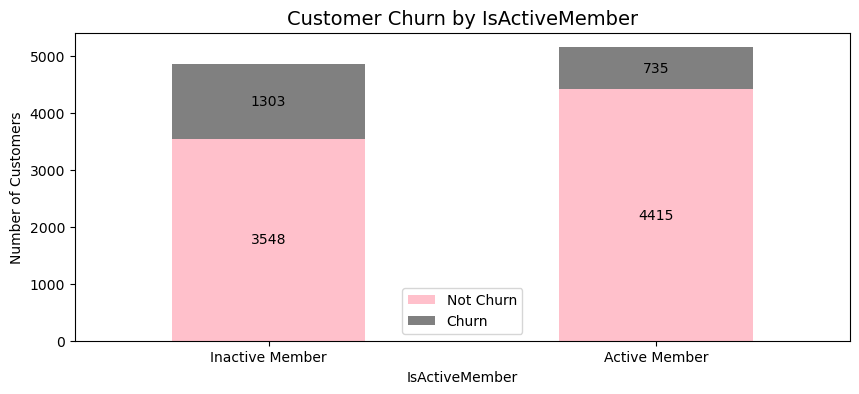

In [28]:
# Calculate the number of churners and non-churners for each IsActiveMember
churn_by_IsActiveMember = df.groupby(['IsActiveMember', 'Exited']).size().unstack()

# Create a bar plot
ax = churn_by_IsActiveMember.plot(kind='bar', stacked=True, color=['pink', 'grey'], figsize=(10, 4))

# Add title and label
plt.title('Customer Churn by IsActiveMember', fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('IsActiveMember', fontsize=10)
plt.ylabel('Number of Customers', fontsize=10)
plt.legend(['Not Churn', 'Churn'])

# Set custom x-axis labels
ax.set_xticklabels(['Inactive Member', 'Active Member'])

# Adds a number above each bar
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Display the plot
plt.show()

In [29]:
# List of values for IsActiveMember
is_active_member_values = [0, 1]

for is_active_member in is_active_member_values:
    # Convert the value 0 to "Inactive Member" and the value 1 to "Active Member"
    is_active_member_label = "Inactive Member" if is_active_member == 0 else "Active Member"

    # Filter customers based on IsActiveMember value
    churn_customers = df.loc[(df['Exited'] == 1) & (df['IsActiveMember'] == is_active_member)]
    total_churn_customers = len(churn_customers)
    print(f"Total customers who churned with {is_active_member_label}:", total_churn_customers)
    
    # Total customers with the current IsActiveMember value
    total_customers = df.loc[df['IsActiveMember'] == is_active_member]
    total_customers_count = len(total_customers)
    print(f"Total customers with {is_active_member_label}:", total_customers_count)
    
    # Calculate percentage of churned customers
    if total_customers_count > 0:
        percentage_churn_customers = (total_churn_customers / total_customers_count) * 100
    else:
        percentage_churn_customers = 0
    
    print(f"Percentage of customers who churned with {is_active_member_label}:", percentage_churn_customers, "%")
    print()

Total customers who churned with Inactive Member: 1303
Total customers with Inactive Member: 4851
Percentage of customers who churned with Inactive Member: 26.860441146155434 %

Total customers who churned with Active Member: 735
Total customers with Active Member: 5150
Percentage of customers who churned with Active Member: 14.271844660194175 %



**Explanation :**  


## **EDA Summary**

# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:#222021;font-size:130%;text-align:center;border-radius:10px 10px;margin-bottom:10px;">**5. Feature Engineering**</p>

## **5.1 Handling Missing Value**

In [30]:
# Delete rows that contain missing values
df = df.dropna().reset_index(drop=True)

**Explanation :**  


In [31]:
# Recheck missing values
df.isna().sum().sort_values(ascending=False)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Explanation :**  


## **5.2 Handling Data Duplicate**

In [32]:
# Delete rows that contain duplicate data
df = df.drop_duplicates()

In [33]:
# Recheck duplicate data
df.duplicated().sum()

0

**Explanation :**  


## **5.3 Splitting Data**

In [34]:
# Splitting the DataFrame into features (X) and target variable (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

**Explanation :**  


In [35]:
# Check the data
display(X_train.head())
display(y_train.head())
display(X_test.head())
display(y_test.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7583,7588,15773789,Pavlova,594,Spain,Female,38.0,7,96858.35,1,1.0,0.0,77511.45
655,660,15603065,Grubb,751,France,Female,30.0,6,0.00,2,1.0,0.0,15766.10
2949,2954,15649136,Williamson,650,France,Female,43.0,6,0.00,2,1.0,1.0,16301.91
3113,3118,15732987,Hs?,721,Spain,Male,43.0,3,88798.34,1,0.0,0.0,45610.63
3882,3887,15720941,Tien,710,Germany,Male,34.0,8,147833.30,2,0.0,1.0,1561.58


7583    0
655     0
2949    0
3113    0
3882    0
Name: Exited, dtype: int64

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
961,966,15602084,Coles,663,France,Female,42.0,5,124626.07,1,1.0,1.0,78004.50
2211,2216,15770225,Padovesi,493,France,Male,36.0,9,0.00,2,1.0,1.0,65816.53
9888,9893,15796370,Shah,604,Spain,Male,40.0,5,155455.43,1,0.0,1.0,113581.85
4445,4450,15569364,Victor,666,France,Male,36.0,3,0.00,2,1.0,0.0,35156.54
9186,9191,15798943,Alexander,646,France,Female,46.0,8,0.00,2,1.0,0.0,133059.15


961     0
2211    0
9888    0
4445    0
9186    0
Name: Exited, dtype: int64

**Explanation :**  


## **5.4 Handling Outlier**

In [36]:
# Filer Numerical Columns into Variable
kolom_numerik = X_train.select_dtypes(include=np.number).columns.to_list()

# Making data and columns for normal distribution
data_numerik_normal = []
kolom_numerik_normal = []

# Making data and columns for skewed distribution
data_numerik_skewed = []
kolom_numerik_skewed = []

# For loop in every numerical column to filer the data distribution into either normal distributed or skewed columns
for kolom in kolom_numerik:
    skewness = X_train[kolom].skew()
    
    # If the data normally distributed
    if skewness <= 0.5 and skewness >= -0.5:            
        kolom_numerik_normal.append(kolom)
        data_numerik_normal.append([kolom, skewness])
        
    # Elif the data is skewed
    elif skewness < -0.5 or skewness > 0.5:
        kolom_numerik_skewed.append(kolom)
        data_numerik_skewed.append([kolom, skewness])

**Explanation :**  


In [37]:
# Showing Normally distributed columns
pd.DataFrame(data=data_numerik_normal, columns=['normal_distributed_column', 'skewness'])

,normal_distributed_column,skewness
0,RowNumber,-0.003787
1,CustomerId,-0.003713
2,CreditScore,-0.068217
3,Tenure,0.019227
4,Balance,-0.149285
5,IsActiveMember,-0.062073
6,EstimatedSalary,0.003556


**Explanation :**  


In [38]:
# Showing skewed columns
pd.DataFrame(data=data_numerik_skewed, columns=['skewed_distributed_column', 'skewness'])

,skewed_distributed_column,skewness
0,Age,1.014592
1,NumOfProducts,0.762308
2,HasCrCard,-0.901728


**Explanation :**  


In [39]:
# Capping Method for Normal Distribution  
winsorizer_normal_dist = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=kolom_numerik_normal,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_normal_dist.fit_transform(X_train)

# Transforming X_test
X_test_capped = winsorizer_normal_dist.transform(X_test)

**Explanation :**  


In [40]:
# Capping Method for Skewed Distribution  
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=kolom_numerik_skewed,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_skewed.fit_transform(X_train_capped)

# Transforming X_test
X_test_capped = winsorizer_skewed.transform(X_test_capped)

**Explanation :**  


In [41]:
# Plot Distribution Comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):
    """
    This function is created to plot histograms and boxplots for a variable before and after outlier handling
    
    Parameters:
    - df_before (pandas.DataFrame): DataFrame before outlier handling
    - df_after (pandas.DataFrame): DataFrame after outlier handling
    - variable (str): The variable to plot
    """
    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='pink')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0], color='grey')
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='pink')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1], color='grey')
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

**Explanation :**  


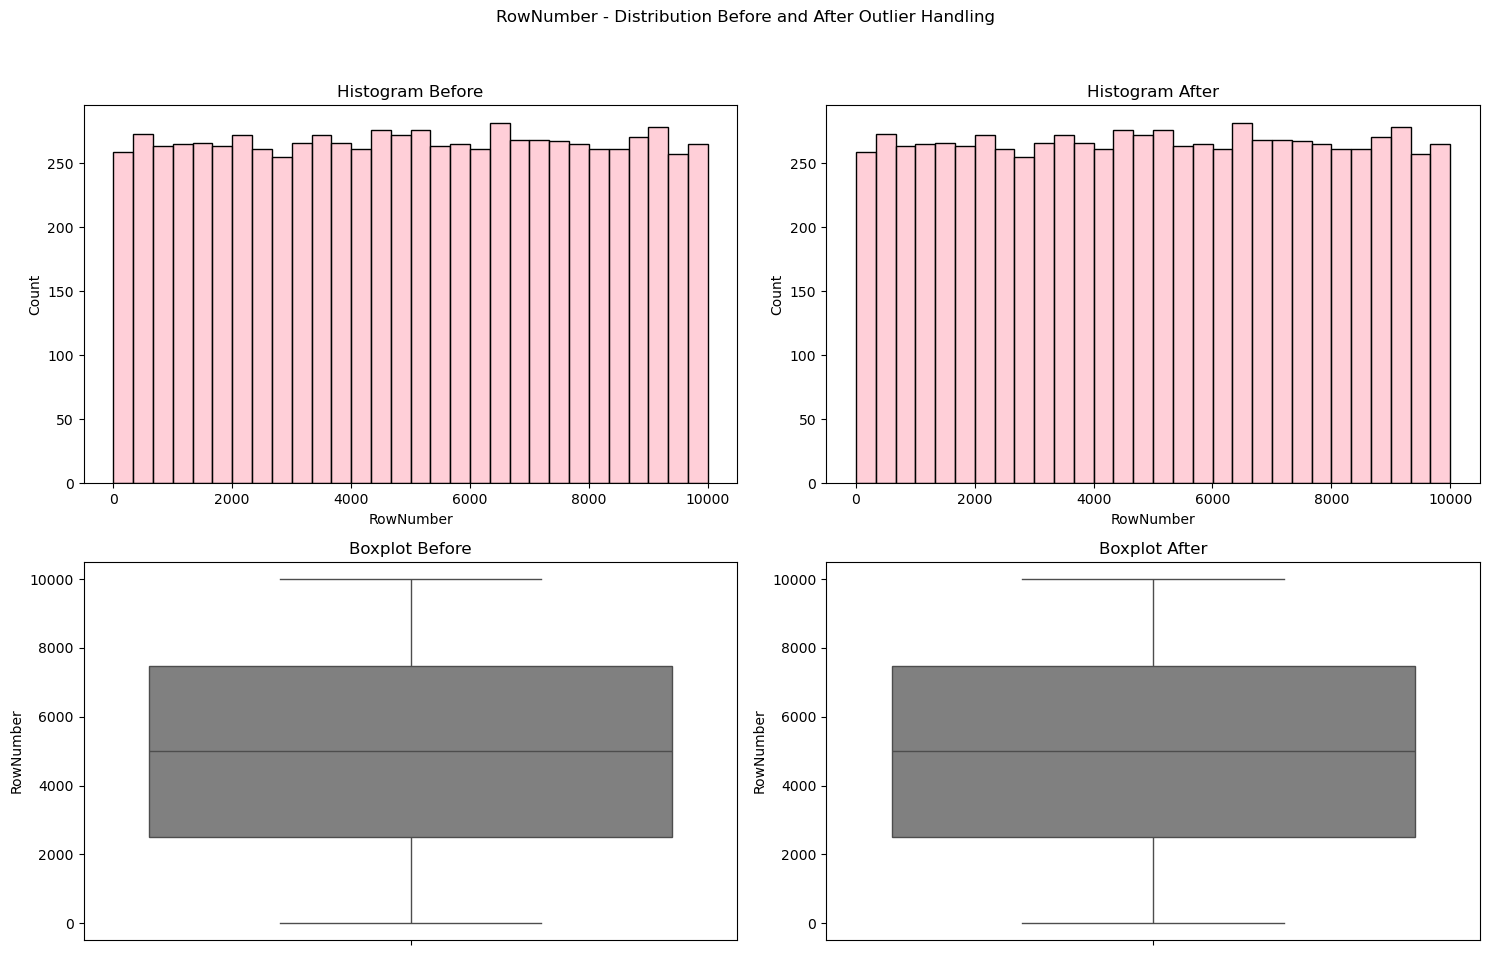

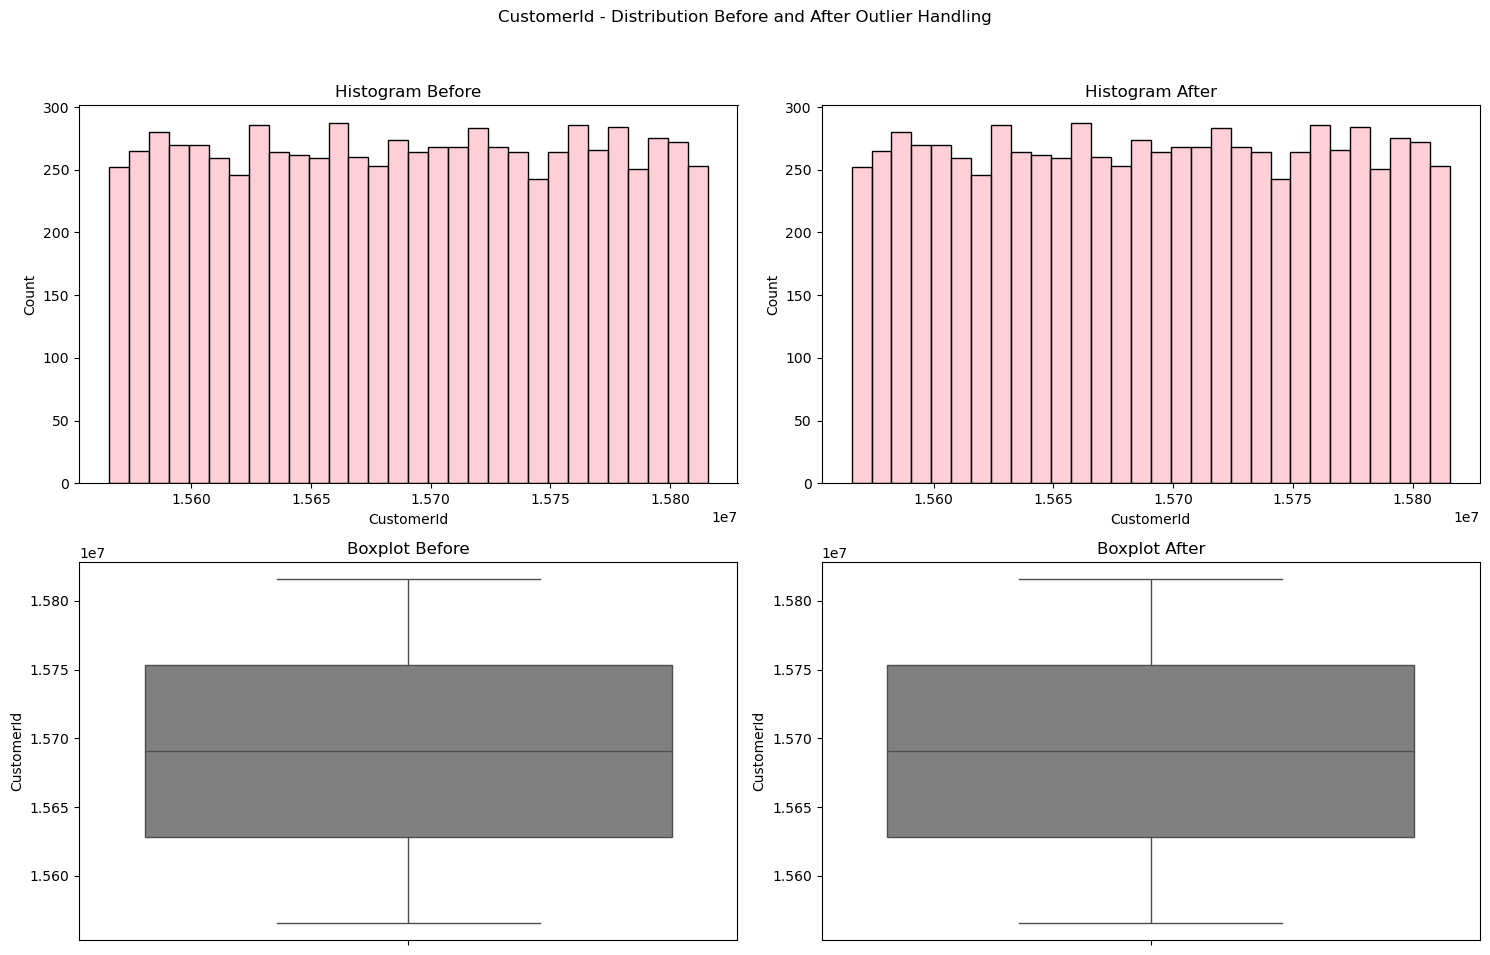

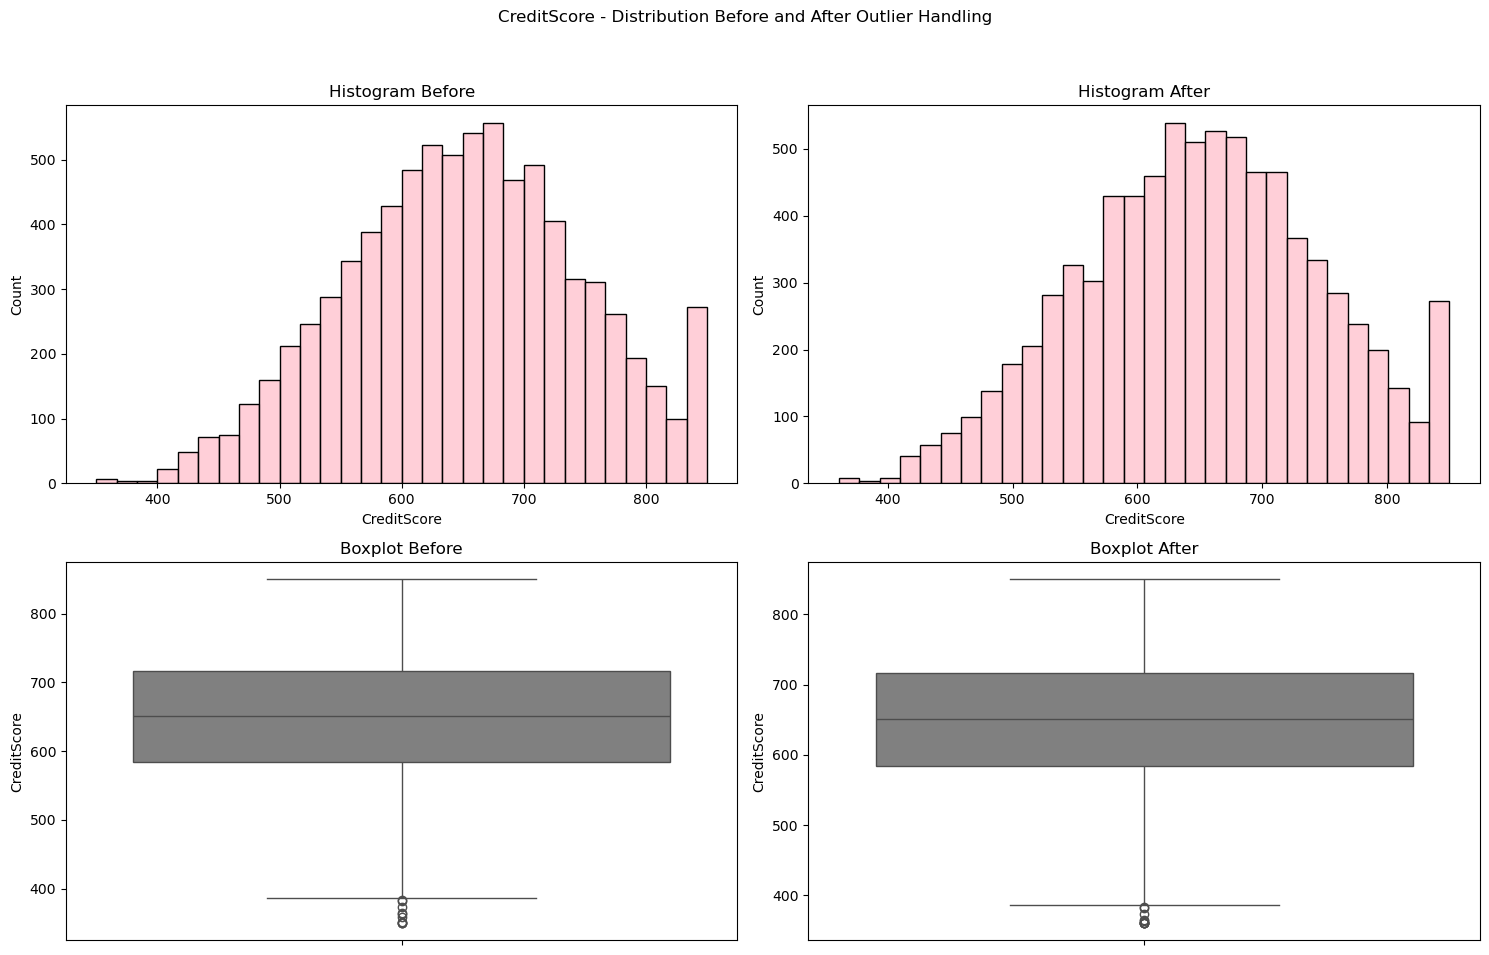

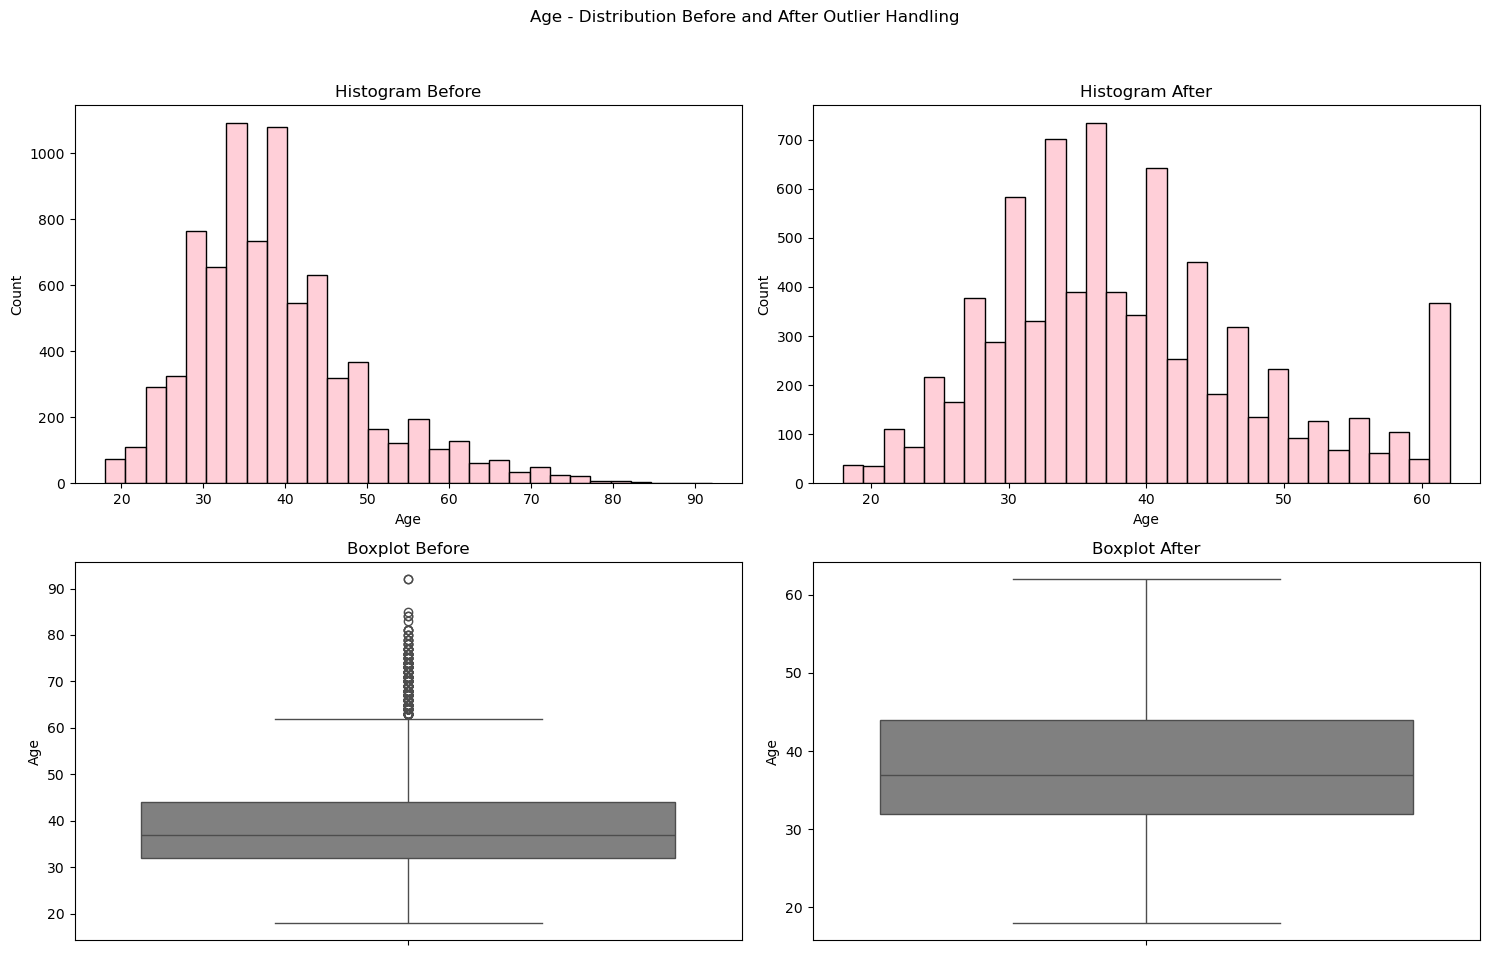

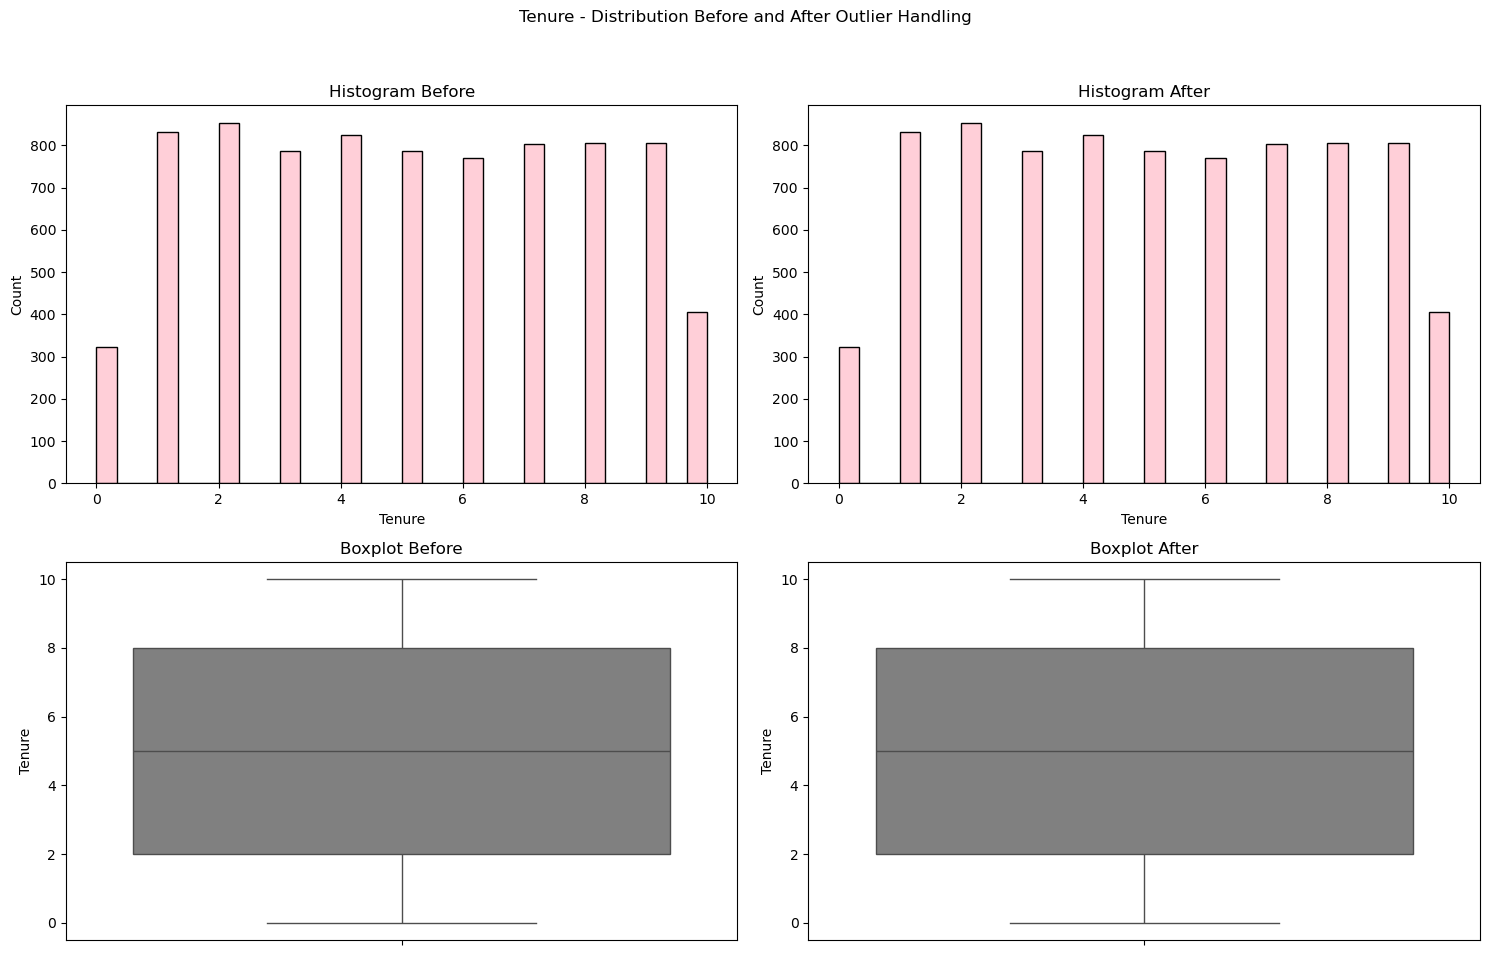

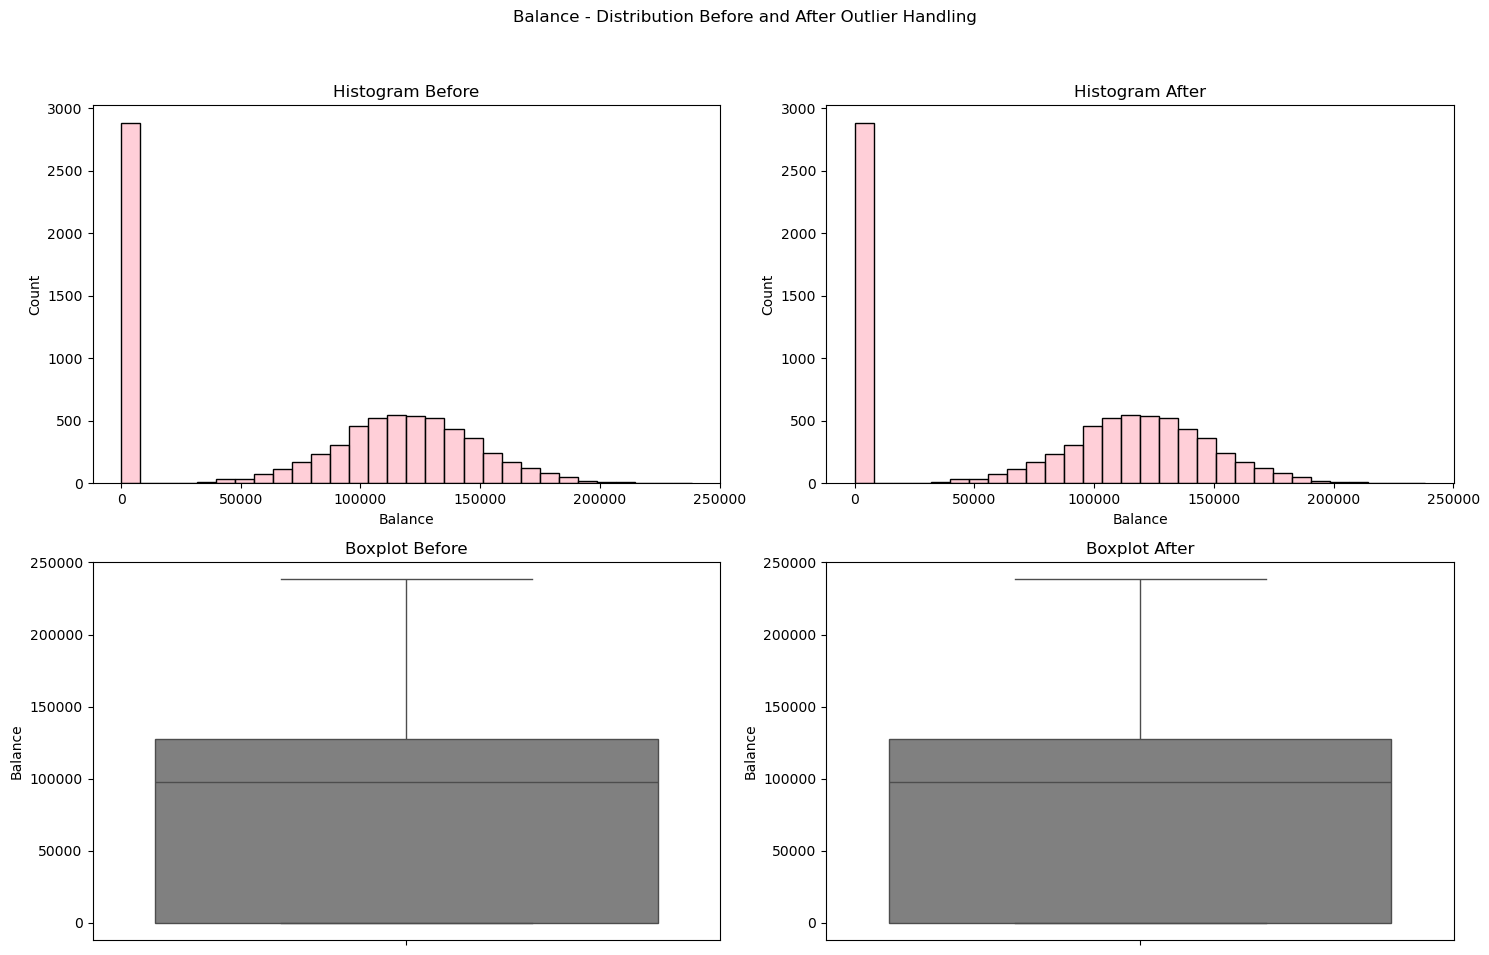

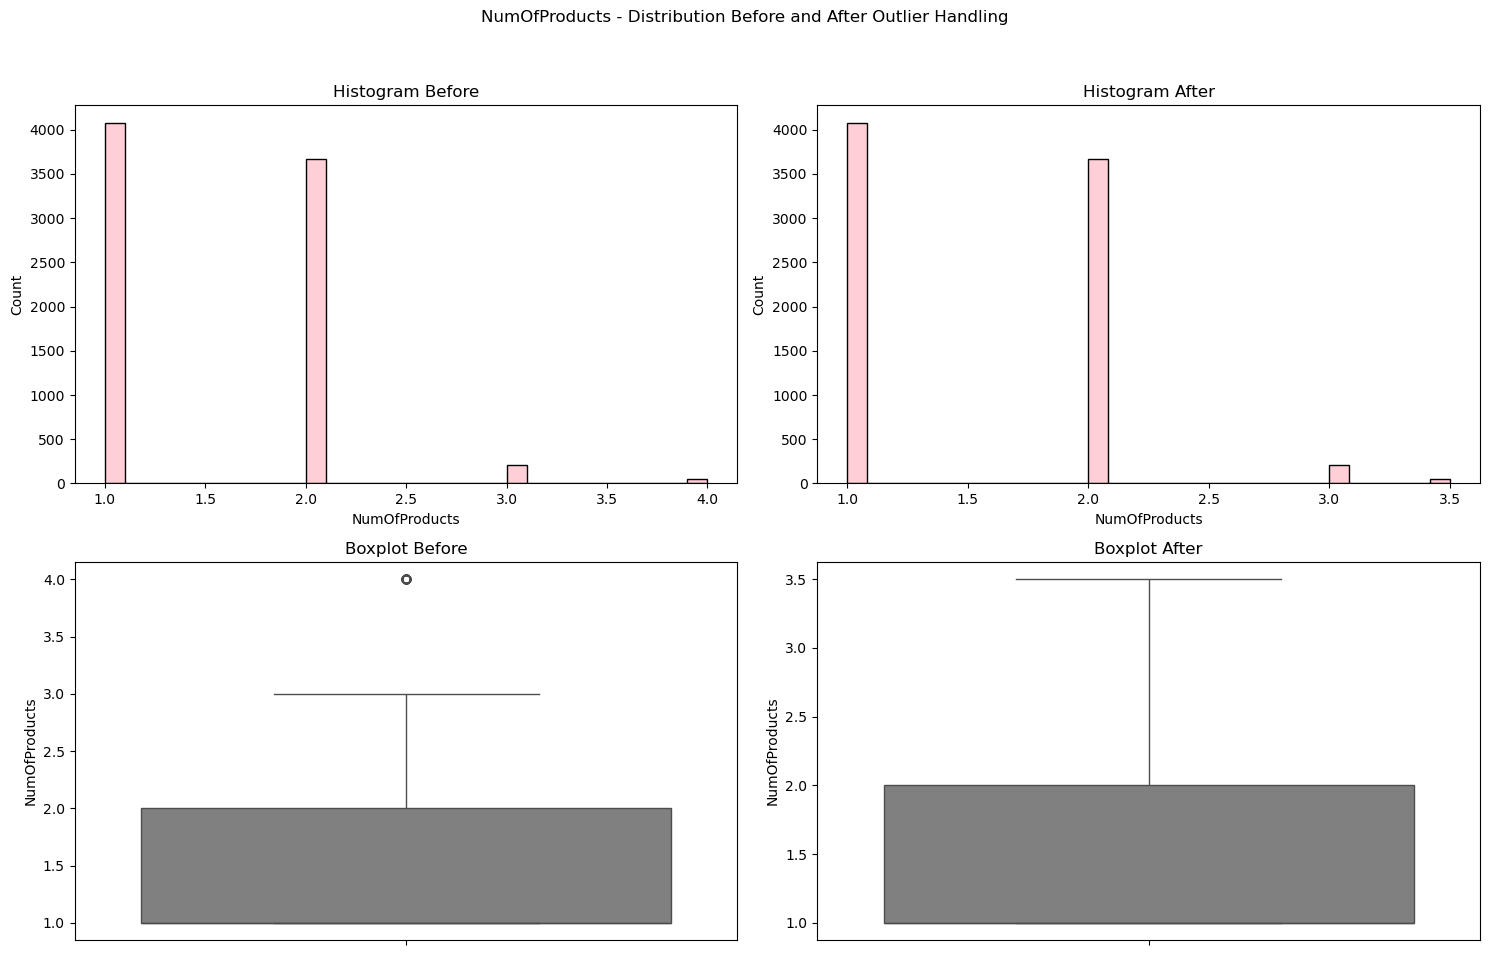

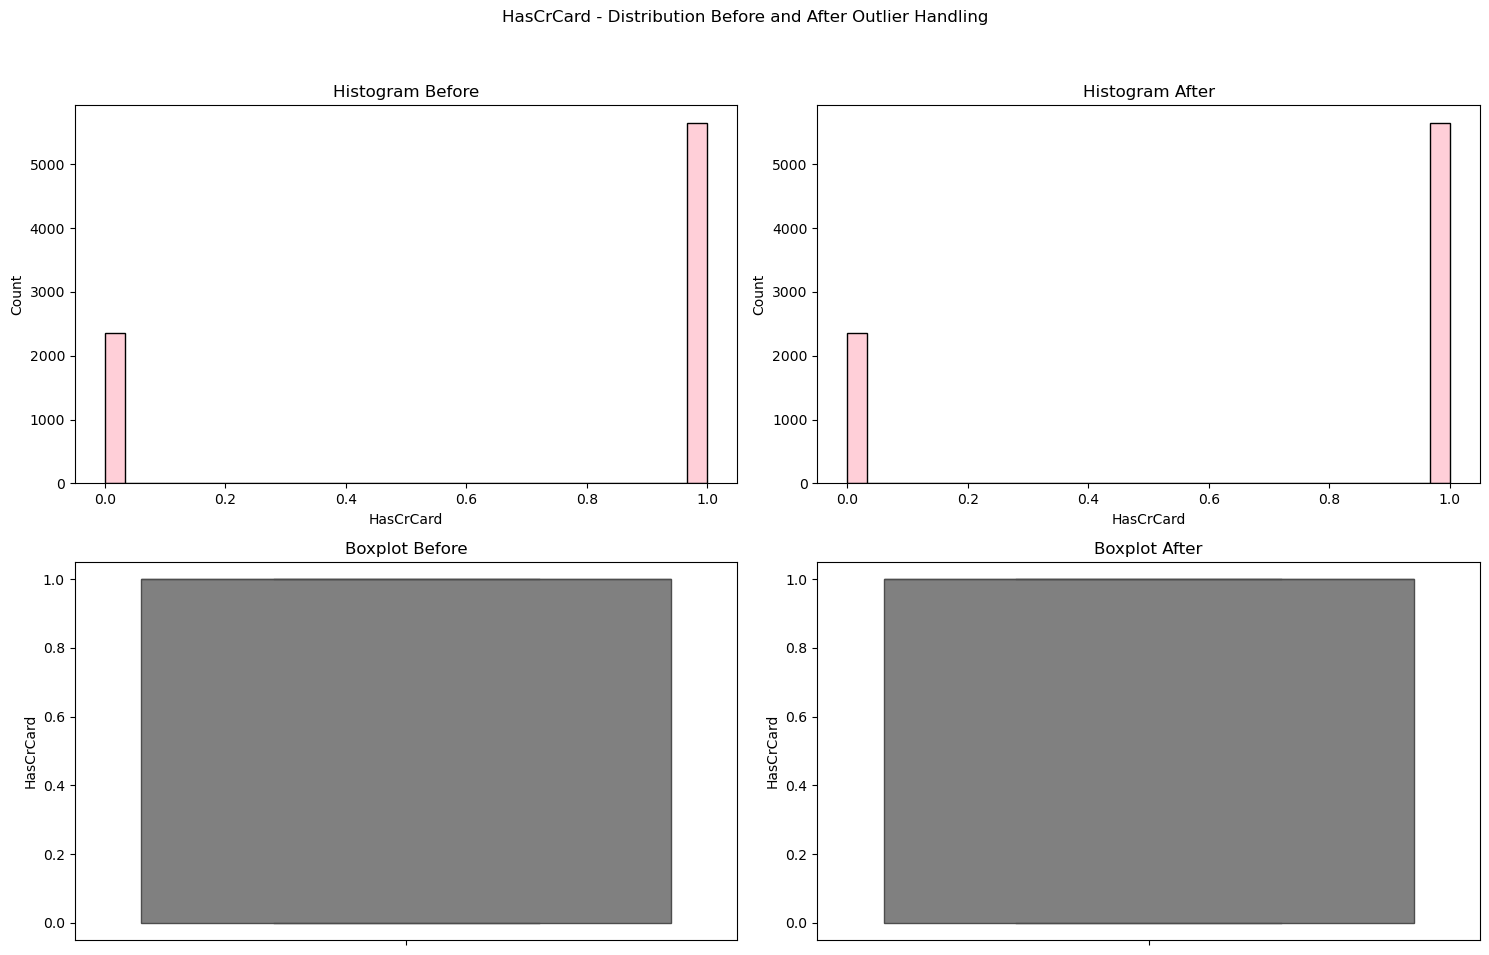

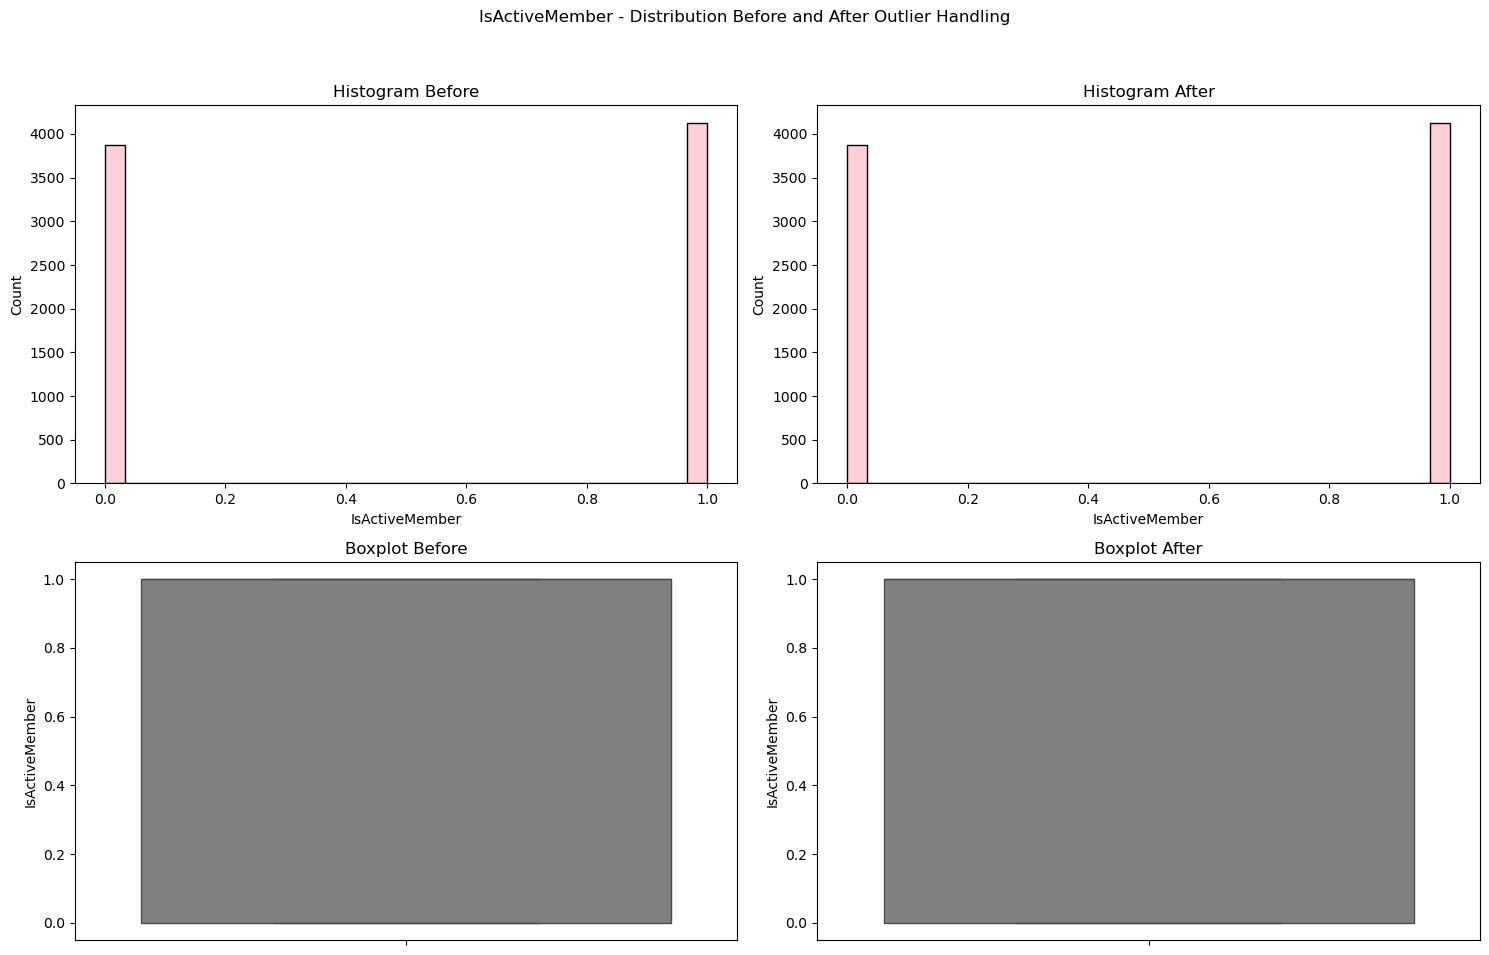

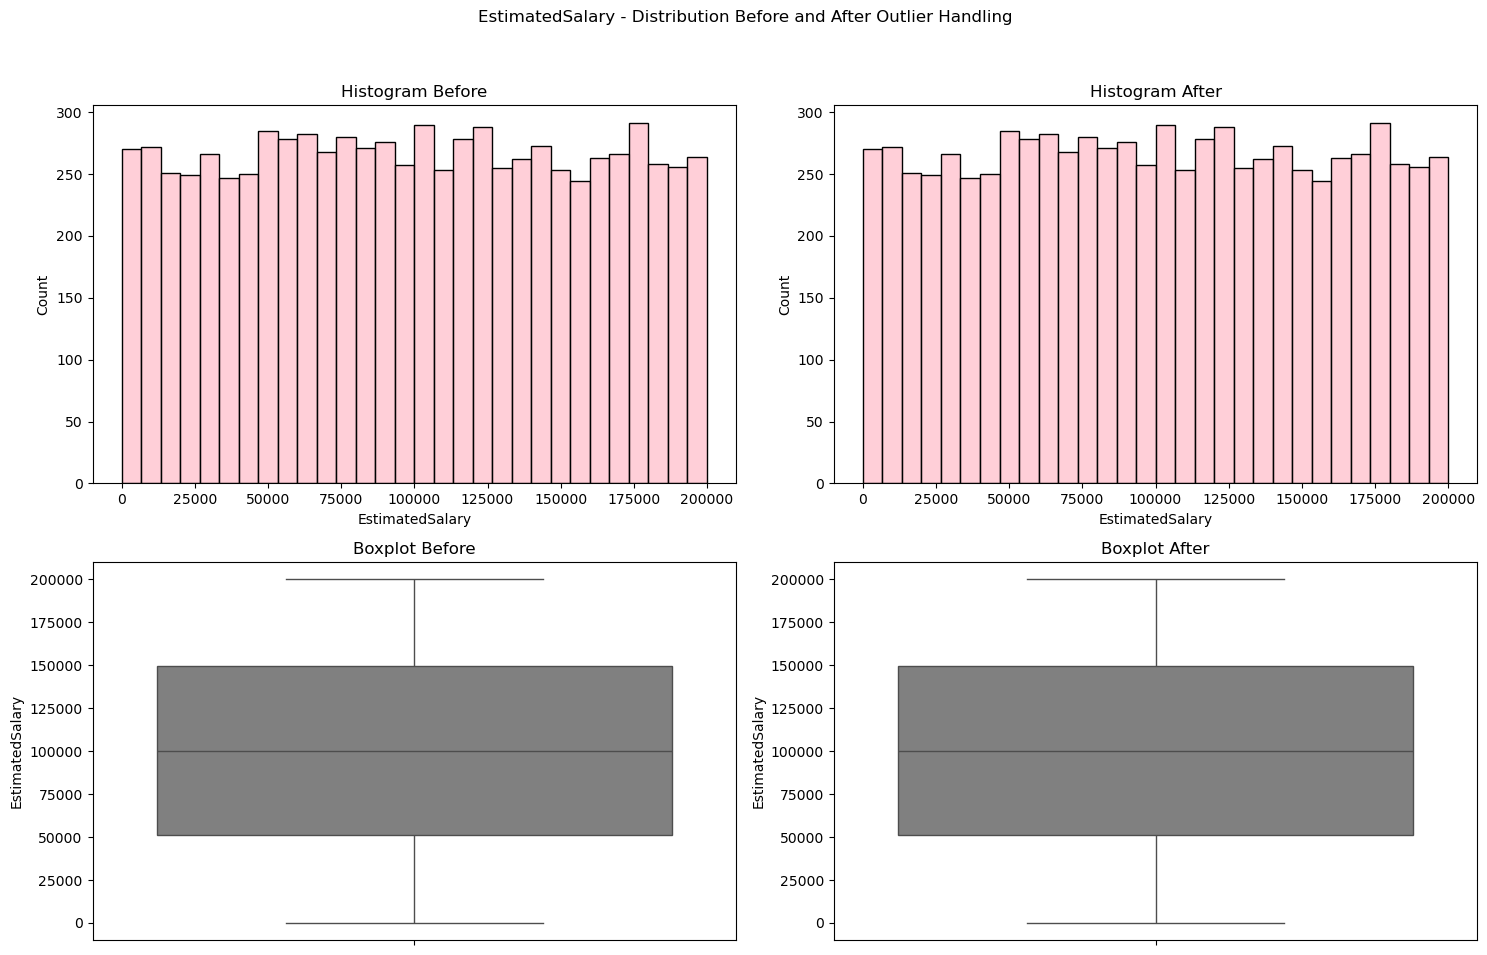

In [42]:
# Using the Function
num_cols = kolom_numerik 
for col in num_cols:
    outlier_handling_plot_comparison(X_train, X_train_capped, col)

**Explanation :**  


## **5.5 Feature Selection**

### **- Split Between Numerical & Categorical Columns**

In [43]:
num_columns = X_train_capped.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_capped.select_dtypes(include=['object']).columns.tolist()

print('Categorical Columns :', cat_columns)
print('Numerical Columns :', num_columns)

Categorical Columns : ['Surname', 'Geography', 'Gender']
Numerical Columns : ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


**Explanation :**  


In [44]:
X_train_num = X_train_capped[num_columns]
X_train_cat = X_train_capped[cat_columns]

X_test_num = X_test_capped[num_columns]
X_test_cat = X_test_capped[cat_columns]

**Explanation :**  


In [45]:
#Finding the correlation between categorical columns and 'Exited' using Kendall Tau's correlation

p_values = []
interpretation = []
cols = []
corr = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)
  corr.append(corr_coef)

  if p_value < 0.05:
    interpretation.append('Significant Correlation')
  else :
    interpretation.append('No Significant Correlation')

pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Interpretation': interpretation })

,Column Name,Correlation Coefficient,P-value,Interpretation
0,Surname,-0.004294,6.383551e-01,No Significant Correlation
1,Geography,0.052129,8.963511e-07,Significant Correlation
2,Gender,-0.102990,3.297142e-20,Significant Correlation


**Explanation :**  


In [46]:
# Finding the correlation between numerical columns and 'Exited' using pearsonr and spearmanr correlation

p_values = []
interpretation = []
cols = []
corr = []

for col in X_train_num.columns:
  if abs(X_train_num[col].skew()) < 0.5:                    #For Normally Distributed Columns
    corr_coef, p_value = pearsonr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant Correlation')
    else :
      interpretation.append('No Significant Correlation')
  else:                                                     #For Non Normally Distributed Columns
    corr_coef, p_value = spearmanr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant Correlation')
    else :
      interpretation.append('No Significant Correlation')

pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Interpretation': interpretation })

,Column Name,Correlation Coefficient,P-value,Interpretation
0,RowNumber,-0.013863,2.151686e-01,No Significant Correlation
1,CustomerId,-0.007470,5.042246e-01,No Significant Correlation
2,CreditScore,-0.030370,6.608982e-03,Significant Correlation
3,Age,0.323048,1.312190e-193,Significant Correlation
4,Tenure,-0.011936,2.858919e-01,No Significant Correlation
5,Balance,0.120068,4.577130e-27,Significant Correlation
6,NumOfProducts,-0.132861,8.101412e-33,Significant Correlation
7,HasCrCard,-0.008676,4.379359e-01,No Significant Correlation
8,IsActiveMember,-0.154742,4.869375e-44,Significant Correlation
9,EstimatedSalary,0.006661,5.514879e-01,No Significant Correlation


**Explanation :**  


In [47]:
# Create new variables to store the relevant categorical and numerical features respectively
selected_cat_col = ['Geography', 'Gender']
selected_num_col = ['CreditScore','Age', 'Balance', 'NumOfProducts', 'IsActiveMember']

**Explanation :**  


In [48]:
# Assign variables again based on the relevant categorical and numerical features
X_train_cat = X_train_cat[selected_cat_col]
X_train_num = X_train_num[selected_num_col]

X_test_cat = X_test_cat[selected_cat_col]
X_test_num = X_test_num[selected_num_col]

**Explanation :**  


In [49]:
# Concat X_train_cat and X_train_num into X_train_final
X_train_final = pd.concat([X_train_cat, X_train_num], axis=1)

# Concat X_test_cat and X_test_num into X_test_final
X_test_final = pd.concat([X_test_cat, X_test_num], axis=1)

**Explanation :**  


In [50]:
# Check the data
display(X_train_final.head())
display(X_test_final.head())

,Geography,Gender,CreditScore,Age,Balance,NumOfProducts,IsActiveMember
7583,Spain,Female,594.0,38.0,96858.35,1.0,0.0
655,France,Female,751.0,30.0,0.00,2.0,0.0
2949,France,Female,650.0,43.0,0.00,2.0,1.0
3113,Spain,Male,721.0,43.0,88798.34,1.0,0.0
3882,Germany,Male,710.0,34.0,147833.30,2.0,1.0


,Geography,Gender,CreditScore,Age,Balance,NumOfProducts,IsActiveMember
961,France,Female,663.0,42.0,124626.07,1.0,1.0
2211,France,Male,493.0,36.0,0.00,2.0,1.0
9888,Spain,Male,604.0,40.0,155455.43,1.0,1.0
4445,France,Male,666.0,36.0,0.00,2.0,0.0
9186,France,Female,646.0,46.0,0.00,2.0,0.0


**Explanation :**  


## **5.6 Scaling & Encoding**

In [51]:
# Using columntransformer to create preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), selected_num_col),
        ('categorical', OrdinalEncoder(), selected_cat_col)
    ],
    remainder='passthrough'
)

**Explanation :**  


# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:#222021;font-size:130%;text-align:center;border-radius:10px 10px;margin-bottom:10px;">**6. Modelling**</p>

## **6.1 Model Definition**

In [52]:
# Making a pipeline for logistic regression
pipe_logreg = make_pipeline(preprocessor, LogisticRegression(random_state=42))
pipe_logreg.fit(X_train_final, y_train)
print('Pipeline steps for Logistic Regression: ', pipe_logreg.steps)

# Making a pipeline for random forest
pipe_rf = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))
pipe_rf.fit(X_train_final, y_train)
print('Pipeline steps for Random Forest: ', pipe_rf.steps)

# Making a pipeline for KNN
pipe_knn = make_pipeline(preprocessor, KNeighborsClassifier())
pipe_knn.fit(X_train_final, y_train)
print('Pipeline steps for KNN: ', pipe_knn.steps)

# Making a pipeline for SVM
pipe_svm = make_pipeline(preprocessor, SVC(random_state=42))
pipe_svm.fit(X_train_final, y_train)
print('Pipeline steps for SVM: ', pipe_svm.steps)

# Making a pipeline for XGBoost
pipe_xgb = make_pipeline(preprocessor, xgb.XGBClassifier(random_state=42))
pipe_xgb.fit(X_train_final, y_train)
print('Pipeline steps for XGBoost: ', pipe_xgb.steps)

Pipeline steps for Logistic Regression:  [('columntransformer', ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric', StandardScaler(),
                                 ['CreditScore', 'Age', 'Balance',
                                  'NumOfProducts', 'IsActiveMember']),
                                ('categorical', OrdinalEncoder(),
                                 ['Geography', 'Gender'])])), ('logisticregression', LogisticRegression(random_state=42))]
Pipeline steps for Random Forest:  [('columntransformer', ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric', StandardScaler(),
                                 ['CreditScore', 'Age', 'Balance',
                                  'NumOfProducts', 'IsActiveMember']),
                                ('categorical', OrdinalEncoder(),
                                 ['Geography', 'Gender'])])), ('randomforestclassifier', RandomForestClassifier(random_state=42))]
Pipeli

**Explanation :**  


## **6.2 Baseline Model**

In [53]:
# Define models
models = {
    'Logistic Regression': pipe_logreg,
    'Random Forest': pipe_rf,
    'KNN': pipe_knn,
    'SVM': pipe_svm,
    'XGBoost': pipe_xgb
}

# Initialize DataFrame to store F1 scores for training and testing
df_model = pd.DataFrame(columns=models.keys(), index=['Training F1-Score', 'Testing F1-Score'])

# Loop over models to calculate F1 scores for both training and testing
for model_name, model in models.items():
    # Calculate F1 score for training data
    y_train_pred = model.predict(X_train_final)
    training_f1 = f1_score(y_train, y_train_pred)
    
    # Calculate F1 score for testing data
    y_test_pred = model.predict(X_test_final)
    testing_f1 = f1_score(y_test, y_test_pred)
    
    # Store F1 scores in DataFrame
    df_model.loc['Training F1-Score', model_name] = training_f1
    df_model.loc['Testing F1-Score', model_name] = testing_f1

df_model

,Logistic Regression,Random Forest,KNN,SVM,XGBoost
Training F1-Score,0.318495,0.999081,0.674656,0.543505,0.835434
Testing F1-Score,0.343284,0.540299,0.571014,0.524752,0.534712


**Explanation :**  


## **6.3 Hyperparameter Tuning Model**

### **6.3.1 Logistic Regression**

In [54]:
# Random parameter for Logistic Regression
random_search_params_logreg = {
    'logisticregression__C': uniform(0.1, 10),
    'logisticregression__penalty': ['l1', 'l2']
}

# Initialize RandomizedSearchCV
logreg_randomcv = RandomizedSearchCV(estimator=pipe_logreg, param_distributions=random_search_params_logreg, cv=5).fit(X_train_final, y_train)

**Explanation :**  


In [55]:
# Show the best parameter
best_param_logreg_rd = logreg_randomcv.best_params_
print(best_param_logreg_rd)
print('\n')

# Show the best estimator
best_pipe_logreg_rd = logreg_randomcv.best_estimator_
print(best_pipe_logreg_rd)

# Creating dataframe
print('\n')
result_df_logreg_rd = pd.DataFrame.from_dict(logreg_randomcv.cv_results_, orient='columns')
print(result_df_logreg_rd.columns)

{'logisticregression__C': 3.17734751058234, 'logisticregression__penalty': 'l2'}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Balance', 'NumOfProducts',
                                                   'IsActiveMember']),
                                                 ('categorical',
                                                  OrdinalEncoder(),
                                                  ['Geography', 'Gender'])])),
                ('logisticregression',
                 LogisticRegression(C=3.17734751058234, random_state=42))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_logisticregression__C', 'param_logisticregression__penalty',
       'params', 'split0_test_score'

**Explanation :**  


### **6.3.2 Random Forest**

In [56]:
# Random parameter for Random Forest
random_search_params_rf = {
    'randomforestclassifier__n_estimators': randint(50, 200),
    'randomforestclassifier__max_depth': [10, 20, 30, None],
    'randomforestclassifier__min_samples_split': randint(2, 10),
    'randomforestclassifier__min_samples_leaf': randint(1, 4),
    'randomforestclassifier__bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
rf_randomcv = RandomizedSearchCV(estimator=pipe_rf, param_distributions=random_search_params_rf, cv=5).fit(X_train_final, y_train)

**Explanation :**  


In [57]:
# Show the best parameter
best_param_rf_rd = rf_randomcv.best_params_
print(best_param_rf_rd)
print('\n')

# Show the best estimator
best_pipe_rf_rd = rf_randomcv.best_estimator_
print(best_pipe_rf_rd)

# Creating dataframe
print('\n')
result_df_rf_rd = pd.DataFrame.from_dict(rf_randomcv.cv_results_, orient='columns')
print(result_df_rf_rd.columns)

{'randomforestclassifier__bootstrap': True, 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 8, 'randomforestclassifier__n_estimators': 77}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Balance', 'NumOfProducts',
                                                   'IsActiveMember']),
                                                 ('categorical',
                                                  OrdinalEncoder(),
                                                  ['Geography', 'Gender'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=2,
                                        min_s

**Explanation :**  


### **6.3.3 KNN**

In [58]:
# Random parameter for KNN
random_search_params_knn = {
    'kneighborsclassifier__n_neighbors': randint(1, 20),
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__metric': ['euclidean', 'manhattan']
}

# Initialize RandomizedSearchCV
knn_randomcv = RandomizedSearchCV(estimator=pipe_knn, param_distributions=random_search_params_knn, cv=5).fit(X_train_final, y_train)

**Explanation :**  


In [59]:
# Show the best parameter
best_param_knn_rd = knn_randomcv.best_params_
print(best_param_knn_rd)
print('\n')

# Show the best estimator
best_pipe_knn_rd = knn_randomcv.best_estimator_
print(best_pipe_knn_rd)

# Creating dataframe
print('\n')
result_df_knn_rd = pd.DataFrame.from_dict(knn_randomcv.cv_results_, orient='columns')
print(result_df_knn_rd.columns)

{'kneighborsclassifier__metric': 'euclidean', 'kneighborsclassifier__n_neighbors': 18, 'kneighborsclassifier__weights': 'uniform'}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Balance', 'NumOfProducts',
                                                   'IsActiveMember']),
                                                 ('categorical',
                                                  OrdinalEncoder(),
                                                  ['Geography', 'Gender'])])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=18))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_kneighborsclassifier__metric',
       'param

**Explanation :**  


### **6.3.4 SVM**

In [60]:
# Random parameter for SVM
random_search_params_svm = {
    'svc__C': uniform(0.1, 10),
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 'auto']
}

# Initialize RandomizedSearchCV
svm_randomcv = RandomizedSearchCV(estimator=pipe_svm, param_distributions=random_search_params_svm, cv=5).fit(X_train_final, y_train)

**Explanation :**  


In [61]:
# Show the best parameter
best_param_svm_rd = svm_randomcv.best_params_
print(best_param_svm_rd)
print('\n')

# Show the best estimator
best_pipe_svm_rd = svm_randomcv.best_estimator_
print(best_pipe_svm_rd)

# Creating dataframe
print('\n')
result_df_svm_rd = pd.DataFrame.from_dict(svm_randomcv.cv_results_, orient='columns')
print(result_df_svm_rd.columns)

{'svc__C': 5.2072822027456205, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Balance', 'NumOfProducts',
                                                   'IsActiveMember']),
                                                 ('categorical',
                                                  OrdinalEncoder(),
                                                  ['Geography', 'Gender'])])),
                ('svc', SVC(C=5.2072822027456205, random_state=42))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_svc__C', 'param_svc__gamma', 'param_svc__kernel', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_te

**Explanation :**  


### **6.3.5 XGBoost**

In [62]:
# Random parameter for XGBoost
random_search_params_xgb = {
    'xgbclassifier__learning_rate': uniform(0.01, 0.3),
    'xgbclassifier__n_estimators': randint(50, 200),
    'xgbclassifier__max_depth': randint(3, 10),
    'xgbclassifier__min_child_weight': randint(1, 10),
    'xgbclassifier__subsample': uniform(0.6, 0.4),
    'xgbclassifier__colsample_bytree': uniform(0.6, 0.4),
    'xgbclassifier__gamma': uniform(0, 0.5),
    'xgbclassifier__reg_alpha': uniform(0, 0.5),
    'xgbclassifier__reg_lambda': uniform(0, 0.5),
    'xgbclassifier__objective': ['binary:logistic']
}

# Initialize RandomizedSearchCV
xgb_randomcv = RandomizedSearchCV(estimator=pipe_xgb, param_distributions=random_search_params_xgb, cv=5).fit(X_train_final, y_train)

**Explanation :**  


In [63]:
# Show the best parameter
best_param_xgb_rd = xgb_randomcv.best_params_
print(best_param_xgb_rd)
print('\n')

# Show the best estimator
best_pipe_xgb_rd = xgb_randomcv.best_estimator_
print(best_pipe_xgb_rd)

# Creating dataframe
print('\n')
result_df_xgb_rd = pd.DataFrame.from_dict(xgb_randomcv.cv_results_, orient='columns')
print(result_df_xgb_rd.columns)

{'xgbclassifier__colsample_bytree': 0.78220695069749, 'xgbclassifier__gamma': 0.30593134488007, 'xgbclassifier__learning_rate': 0.08813404337036887, 'xgbclassifier__max_depth': 9, 'xgbclassifier__min_child_weight': 9, 'xgbclassifier__n_estimators': 114, 'xgbclassifier__objective': 'binary:logistic', 'xgbclassifier__reg_alpha': 0.07014027205757906, 'xgbclassifier__reg_lambda': 0.03512595982271216, 'xgbclassifier__subsample': 0.7297722912702871}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Balance', 'NumOfProducts',
                                                   'IsActiveMember']),
                                                 ('categorical',
                                                  OrdinalEncoder(),
                 

**Explanation :**  


In [64]:
# Define the tuned model
models = {
    'Tuned Logistic Regression' : best_pipe_logreg_rd,
    'Tuned Random Forest' : best_pipe_rf_rd,
    'Tuned KNN' : best_pipe_knn_rd,
    'Tuned SVM': best_pipe_svm_rd,
    'Tuned XGBoost': best_pipe_xgb_rd
}

# Define the metrics
metrics = {
    'F1-Score': f1_score
}

# Initialize DataFrame to store F1 scores for training and testing
model_tuning = pd.DataFrame(columns=models.keys(), index=['Training F1-Score', 'Testing F1-Score'])

# Loop over metrics and models to calculate F1 scores for both training and testing
for metric in metrics.keys():
    for model_name, model in models.items():
        # Calculate F1 score for training data
        y_train_pred = model.predict(X_train_final)
        training_f1 = metrics[metric](y_train, y_train_pred)
        
        # Calculate F1 score for testing data
        y_test_pred = model.predict(X_test_final)
        testing_f1 = metrics[metric](y_test, y_test_pred)
        
        # Store F1 scores in DataFrame
        model_tuning.loc['Training F1-Score', model_name] = training_f1
        model_tuning.loc['Testing F1-Score', model_name] = testing_f1

model_tuning

,Tuned Logistic Regression,Tuned Random Forest,Tuned KNN,Tuned SVM,Tuned XGBoost
Training F1-Score,0.319266,0.663626,0.584112,0.585153,0.707186
Testing F1-Score,0.343284,0.55573,0.519481,0.5209,0.56621


**Explanation :**  


# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:#222021;font-size:130%;text-align:center;border-radius:10px 10px;margin-bottom:10px;">**7. Model Evaluation**</p>

In [65]:
# Create function for model evaluation
def evaluate_models(models, X_train_final, y_train, cv=5):
    """
    Evaluates a list of trained models using cross-validation.
    
    Parameters:
        models: A dictionary where keys are model names and values are trained pipeline models.
        X_train_final: Training features.
        y_train: True labels for training data.
        cv: Number of folds for cross-validation (default is 5).
        
    Returns:
        scores_df: A pandas DataFrame containing evaluation scores for each model.
    """
    scores = {}
    for name, model in models.items():
        print(f"Evaluating {name}...")
        # Predict on training data
        y_pred = model.predict(X_train_final)
        accuracy = accuracy_score(y_train, y_pred)
        precision = precision_score(y_train, y_pred)
        recall = recall_score(y_train, y_pred)
        f1 = f1_score(y_train, y_pred)
        # Cross-validation
        cv_scores = cross_val_score(model, X_train_final, y_train, cv=cv, scoring='f1')
        avg_cv_score = cv_scores.mean()
        std_cv_score = cv_scores.std()
        # Storing scores
        scores[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Cross-Validation Mean Score': avg_cv_score,
            'Cross-Validation Std Deviation': std_cv_score
        }
    scores_df = pd.DataFrame(scores).T  # Convert dictionary to DataFrame
    return scores_df

# Assuming models are already defined and fitted
models = {
    'KNN': pipe_knn,
    'SVM': pipe_svm,
    'LogisticRegression': pipe_logreg,
    'RandomForest': pipe_rf,
    'XGBoost': pipe_xgb
}

# Evaluating models
evaluation_train_results_df = evaluate_models(models, X_train_final, y_train)

print("Evaluation scores for each model:")
display(evaluation_train_results_df)

Evaluating KNN...
Evaluating SVM...
Evaluating LogisticRegression...
Evaluating RandomForest...
Evaluating XGBoost...
Evaluation scores for each model:


,Accuracy,Precision,Recall,F1 Score,Cross-Validation Mean Score,Cross-Validation Std Deviation
KNN,0.884567,0.795511,0.585679,0.674656,0.563646,0.029614
SVM,0.861556,0.833123,0.403305,0.543505,0.525732,0.026115
LogisticRegression,0.814282,0.636697,0.212362,0.318495,0.319516,0.022103
RandomForest,0.999625,1.000000,0.998164,0.999081,0.575809,0.024874
XGBoost,0.939595,0.942352,0.750306,0.835434,0.573451,0.016691


**Explanation :**  

Best model is RandomForest

# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:#222021;font-size:130%;text-align:center;border-radius:10px 10px;margin-bottom:10px;">**8. Model Saving**</p>

In [66]:
# Save best model
pickle.dump(best_pipe_rf_rd, open('model.pkl', 'wb'))
joblib.dump(best_pipe_rf_rd, 'model.joblib')

['model.joblib']

# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:#222021;font-size:130%;text-align:center;border-radius:10px 10px;margin-bottom:10px;">**9. Model Inference**</p>

In [67]:
# Load model
model = joblib.load('model.joblib')

In [68]:
# Create a random data for inference
random_data = [
    {
        'RowNumber': i + 1,
        'CustomerId': np.random.randint(10000000, 20000000),
        'Surname': 'Surname_' + str(i + 1),
        'CreditScore': np.random.randint(300, 850),
        'Geography': np.random.choice(['France', 'Spain', 'Germany']),
        'Gender': np.random.choice(['Male', 'Female']),
        'Age': np.random.normal(loc=40, scale=10),
        'Tenure': np.random.randint(0, 11),
        'Balance': np.random.uniform(0, 250000),
        'NumOfProducts': np.random.randint(1, 5),
        'HasCrCard': np.random.choice([0, 1]),
        'IsActiveMember': np.random.choice([0, 1]),
        'EstimatedSalary': np.random.uniform(20000, 150000)
    }
    for i in range(5)  
]

# Convert into DataFrame
random_df = pd.DataFrame(random_data)

# Display the DataFrame
random_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,17231991,Surname_1,337,Spain,Male,35.288218,7,233983.661124,1,0,1,39851.802786
1,2,14912892,Surname_2,515,France,Female,40.999368,9,170889.886996,3,0,0,118685.112069
2,3,17837773,Surname_3,802,Spain,Female,51.750165,8,168570.050004,3,0,1,57145.419195
3,4,12983085,Surname_4,420,France,Male,25.124411,2,122535.401385,2,0,0,149029.869512
4,5,12796632,Surname_5,743,France,Female,31.906688,4,207680.205170,1,1,1,72548.304509


In [69]:
# Predict
prediction = model.predict(random_df)
random_df_prediction = pd.DataFrame(prediction, columns=['Exited'])
random_df_prediction

,Exited
0,1
1,1
2,1
3,0
4,0


In [70]:
inference = pd.concat([random_df, random_df_prediction], axis=1)
inference

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,17231991,Surname_1,337,Spain,Male,35.288218,7,233983.661124,1,0,1,39851.802786,1
1,2,14912892,Surname_2,515,France,Female,40.999368,9,170889.886996,3,0,0,118685.112069,1
2,3,17837773,Surname_3,802,Spain,Female,51.750165,8,168570.050004,3,0,1,57145.419195,1
3,4,12983085,Surname_4,420,France,Male,25.124411,2,122535.401385,2,0,0,149029.869512,0
4,5,12796632,Surname_5,743,France,Female,31.906688,4,207680.205170,1,1,1,72548.304509,0


# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:#222021;font-size:130%;text-align:center;border-radius:10px 10px;margin-bottom:10px;">**10. Conclusion**</p>